In [1]:
%pylab inline
import pandas as pd
import dask.dataframe as dd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dask.array as da
import datetime 
import gc
from multiprocessing import pool
import cPickle as pickle
import os
import feather

In [3]:
newdata=feather.read_dataframe("../input/tmp_R_sales.feather")

In [8]:
print "count by counties"

count by counties


In [7]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    a=pd.pivot_table(subdf,index='county',columns='assessmentyear',values='parcelid',aggfunc='count')
    a['mean']=a.mean(1)
    a=a.sort_values('mean',ascending=False).astype(np.float32)
    print "state", state
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 50):
        display(a)

state 06


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
06085           403877.0  410179.0  412050.0  413142.0  413517.0  414790.0   
06001           334046.0  336145.0  337649.0  377146.0  378211.0  380001.0   
06013           323207.0  324693.0  325244.0  325981.0  326291.0  326702.0   
06081           188153.0  188908.0  189252.0  189615.0  189832.0  190117.0   
06097           143343.0  143593.0  143827.0  140028.0  140242.0  140347.0   
06075           133558.0  136395.0  138333.0  139809.0  142203.0  143355.0   
06041            78999.0   79094.0   79160.0   79378.0   79532.0   79643.0   
06087            71327.0   71781.0   72111.0   72352.0   72482.0   72654.0   
06055            36875.0   37073.0   37191.0   37276.0   37300.0   37346.0   
06095                1.0       1.0       1.0       1.0       1.0       1.0   

assessmentyear      2013      2014      2015      2016      2017  \
county                                                             
06085           416674.0       5.0  421370.0  421468.0  421499.0   
06001           381652.0  382681.0  384184.0  384213.0  384221.0   
06013           326752.0  328387.0  312274.0  329422.0  329436.0   
06081           190321.0  190663.0  190999.0  191003.0  191004.0   
06097           145264.0  145344.0  145833.0  145848.0  145850.0   
06075           143754.0  144173.0  145740.0  145749.0  145763.0   
06041            79761.0   79867.0   80096.0   80098.0   80099.0   
06087                1.0   73236.0   73373.0   73373.0   73375.0   
06055            37780.0   37857.0   38067.0   38067.0   38073.0   
06095                1.0       1.0       1.0       1.0       1.0   

assessmentyear           mean  
county                         
06085           377142.812500  
06001           369104.468750  
06013           325308.093750  
06081           189987.906250  
06097           143592.640625  
06075           141712.000000  
06041            79611.546875  
06087            66005.906250  
06055            37536.816406  
06095                1.000000

state 19


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
19153           139527.0  141066.0  141868.0  142407.0  143096.0  143731.0   
19113            67005.0   69469.0       5.0   71760.0   71963.0   74302.0   
19013            44001.0   44814.0   45790.0   46095.0   46345.0   46745.0   
19103                NaN   38075.0   38778.0       NaN   40273.0   41350.0   
19163            45854.0   51042.0   53923.0       1.0       1.0   56193.0   
19193            26265.0   26571.0   26759.0   26840.0   26850.0   32521.0   
19155            26771.0       NaN   28532.0   28629.0   28655.0   28741.0   
19061                NaN   28215.0   28455.0   28759.0   29171.0   29247.0   
19169            13355.0   17159.0   17236.0   17467.0   23183.0   27523.0   
19049            17940.0   19197.0   19803.0   20366.0   20884.0   22733.0   
19127            13822.0   13893.0   13931.0   13956.0   13987.0   14022.0   
19181            12449.0   12690.0   12955.0   13300.0   13331.0   13645.0   
19033            17211.0   11418.0   11441.0   11489.0   11503.0   15298.0   
19187                NaN   11764.0   11798.0   11809.0   11774.0       NaN   
19139            11737.0   11936.0   11898.0   12057.0   12084.0   12055.0   
19059             6755.0       NaN       NaN       NaN       NaN       NaN   
19179            10775.0   10854.0   10892.0   10924.0   10881.0   11417.0   
19125             7348.0    8592.0    8659.0    8774.0    8764.0    9574.0   
19099             9807.0    9987.0   10005.0   10089.0    9997.0    9985.0   
19149             7526.0    7621.0    7647.0    7646.0    7617.0    7919.0   
19015             7334.0    7454.0    7508.0    7501.0    7614.0    8098.0   
19043             2200.0       NaN       NaN    7209.0    7245.0    7494.0   
19067             4830.0       NaN       NaN    6486.0    6509.0    6472.0   
19123             5616.0    5743.0    5764.0    5802.0    5784.0    6491.0   
19141             4596.0    4684.0    4697.0    4711.0    4709.0    5011.0   
19005             3878.0    3978.0    4029.0    4054.0    4104.0    4257.0   
19085             4240.0    4287.0    4279.0    4315.0    4290.0    4885.0   
19081             3002.0    3637.0    3641.0    3830.0    3829.0    4069.0   
19035             3841.0    3899.0    3919.0    3955.0    3966.0    4003.0   
19189             3933.0    3942.0    3977.0    4002.0    3232.0    3706.0   
19137             3435.0       NaN       NaN    3989.0    3999.0    4006.0   
19095             3307.0       NaN       NaN       NaN       NaN       NaN   
19089             3077.0    3102.0    3146.0    3184.0    3195.0    3308.0   
19077             2724.0    2190.0    2200.0    2188.0    2149.0    2143.0   
19115             2327.0    2338.0    2338.0    2343.0    2330.0    2341.0   
19023                3.0       3.0       3.0       3.0       3.0       3.0   
19171                2.0       2.0       2.0       2.0       2.0       2.0   
19011                2.0       2.0       1.0       2.0       2.0       3.0   
19105                1.0       3.0       2.0       3.0       3.0       3.0   
19109                2.0       2.0       2.0       2.0       2.0       2.0   
19037                2.0       2.0       2.0       2.0       2.0       2.0   
19055                NaN       NaN       NaN       2.0       2.0       2.0   
19075                1.0       1.0       1.0       1.0       1.0       1.0   
19093                NaN       NaN       NaN       1.0       1.0       1.0   
19117                1.0       1.0       1.0       1.0       1.0       1.0   
19111                NaN       NaN       NaN       1.0       1.0       1.0   
19157                1.0       1.0       1.0       1.0       1.0       1.0   
19165                1.0       1.0       1.0       1.0       1.0       1.0   
19167                1.0       1.0       1.0       1.0       1.0       1.0   
19083                N

state 36


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
36081            74851.0  255356.0  286830.0  289025.0  290807.0  292125.0   
36047           189994.0  220040.0  224837.0  228016.0  231052.0  233092.0   
36085           104198.0  105019.0  112335.0  112581.0  112872.0  113036.0   
36061             8194.0    7952.0   91376.0   94352.0   96512.0   97603.0   
36005            60861.0   77275.0   77904.0   78209.0   78424.0   78593.0   
36119               10.0      10.0      10.0      10.0      10.0      10.0   

assessmentyear      2013      2015      2016           mean  
county                                                       
36081           292732.0  295276.0  295786.0  263643.125000  
36047           234206.0  237313.0  237909.0  226273.218750  
36085           113250.0  114145.0  114436.0  111319.109375  
36061            98286.0  101902.0  101931.0   77567.554688  
36005            78671.0   79086.0   79215.0   76470.890625  
36119               10.0      10.0      10.0      10.000000

state 37


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
37119           273024.0  278349.0  283272.0  288175.0  290624.0  290481.0   
37183           237547.0  248413.0  254425.0  259725.0  263207.0  267082.0   
37081           101884.0  103895.0  104544.0  174470.0  175084.0  175373.0   
37051           101068.0  103102.0  104497.0  105522.0  108395.0  109363.0   
37067            79665.0   80009.0  111620.0  112941.0  113800.0  118786.0   
37063            77506.0   78396.0   80203.0   80858.0   81905.0   82207.0   
37129            74436.0   74594.0   71066.0   73436.0   73752.0   74629.0   
37179            75499.0   77091.0   78035.0   71313.0   79729.0   80020.0   
37025            60171.0   62839.0   63917.0   65095.0   65484.0   65983.0   
37019            57174.0   61010.0   62123.0   62772.0   61771.0   62541.0   
37097            56264.0   58265.0   59462.0   59733.0   58121.0   61700.0   
37021            40600.0       4.0   74584.0   75862.0   77043.0   78232.0   
37071            63932.0   65822.0   66836.0   67521.0   68108.0   68429.0   
37057            53541.0   54754.0   55315.0   55727.0   56005.0   56502.0   
37035            51604.0   52415.0   53126.0   53493.0   54170.0   54381.0   
37133            40143.0   42234.0   43403.0   45356.0   47824.0   48981.0   
37147            29036.0   44549.0   44974.0   45476.0   45824.0   46075.0   
37031                NaN       NaN   37596.0   37690.0   36846.0   38659.0   
37159            43609.0   44484.0       8.0   45471.0   45804.0   45981.0   
37089            37723.0   39217.0   39874.0   40625.0   39421.0   39632.0   
37135            33526.0   34052.0   34084.0   34160.0   34168.0   34162.0   
37087            24317.0   25275.0       NaN   25502.0       NaN       NaN   
37151            43280.0   44144.0       7.0   44546.0   44833.0   45286.0   
37049            31110.0   31576.0   31840.0   31994.0   32098.0   32272.0   
37027            31143.0   31264.0   31218.0   31207.0   31328.0   31526.0   
37085            31195.0   32376.0   27608.0   28343.0   31007.0   31381.0   
37109            24479.0   25366.0   25822.0   25905.0   26041.0   26231.0   
37157            24723.0   24645.0   24454.0   24276.0   24034.0   23916.0   
37045            26802.0   27004.0       6.0   27466.0   27492.0   27689.0   
37167            20694.0   21010.0   21241.0   21471.0   21608.0   21731.0   
37113                NaN       NaN    5956.0   20918.0   21091.0   20951.0   
37037            17546.0   18507.0   19232.0   19591.0   20360.0   20362.0   
37069             4938.0   17336.0   17702.0   17808.0   18095.0   18327.0   
37065                NaN       NaN       NaN   16086.0   16159.0   16174.0   
37171                NaN       NaN       NaN   14514.0   16123.0   16299.0   
37127            20268.0   20796.0       2.0   21390.0   21335.0   21160.0   
37077            11783.0   14453.0   15006.0   15447.0   15475.0   15827.0   
37001               15.0      17.0      17.0      20.0      18.0      23.0   
37141                1.0       1.0       1.0   19838.0   20452.0   20576.0   
37161                8.0      12.0   10672.0   18255.0   23604.0   23300.0   
37195                NaN       NaN       NaN   16326.0   16375.0       2.0   
37175                NaN       NaN       NaN   13455.0   13472.0   13205.0   
37145                NaN       NaN       NaN   12861.0   12948.0   12986.0   
37139                NaN       NaN       NaN    9710.0       NaN   11126.0   
37083            10406.0   10481.0   10517.0   10574.0   10613.0   10675.0   
37059                1.0       1.0   14407.0   14111.0   14069.0   13660.0   
37189                1.0       1.0       1.0   21661.0   22736.0   22686.0   
37105                2.0       2.0       1.0   18269.0   18403.0   18422.0   
37093                NaN       NaN       NaN   10884.0   11427.0       NaN   
37191            11626

state 39


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
39035           407867.0  410642.0  411450.0  410043.0  410518.0  411351.0   
39049           333216.0  335726.0      10.0  338706.0  339767.0      12.0   
39153           190465.0  190700.0  191126.0  191464.0  192038.0  192137.0   
39095           146618.0  146903.0  146991.0  147139.0  147177.0  147250.0   
39151           126227.0  127604.0  127675.0  127929.0  131294.0  131572.0   
39017           112872.0  113302.0  113554.0  113652.0  113788.0  113978.0   
39093            99297.0  100806.0  100461.0  101258.0  101568.0  101738.0   
39099            86836.0   87285.0   87426.0   87669.0   87716.0   87704.0   
39155            72091.0   72327.0   72328.0   72398.0   72600.0   72996.0   
39165            48378.0   69598.0   70835.0   70658.0   71764.0   72130.0   
39041            60769.0   61263.0   61563.0   61998.0   62458.0   62932.0   
39113             7515.0   13103.0    7671.0    7366.0    6416.0      10.0   
39103            50211.0   50925.0   51058.0   51338.0   52244.0   59242.0   
39089            45482.0   45856.0   46135.0   54997.0   54377.0   55093.0   
39057            49834.0   50299.0   50443.0   50496.0   50629.0   50748.0   
39045            46977.0   47119.0   47190.0   47350.0   47605.0   47715.0   
39023            46039.0   46170.0   46202.0   46323.0   46312.0   46308.0   
39133            30073.0   46015.0   46030.0   46096.0   46263.0   46297.0   
39173            42977.0   43228.0   43333.0   43822.0       5.0   44133.0   
39139                NaN   38391.0   38441.0   38434.0   38572.0   38592.0   
39029            37407.0   37393.0   37449.0   37590.0   37535.0   37495.0   
39109            36584.0   34692.0   36910.0   37129.0   37286.0   37521.0   
39043            29742.0   29763.0   29864.0   29911.0   29977.0   30339.0   
39007            31248.0   31593.0       2.0   31588.0   31741.0   31739.0   
39013            25114.0   25311.0   25257.0   25408.0   25475.0   25687.0   
39025             7123.0    7030.0    7037.0    6840.0    6766.0    6379.0   
39101                NaN       NaN   18943.0   20817.0   20734.0   20826.0   
39157                1.0       1.0   29634.0   29758.0   29696.0   29863.0   
39077            18964.0   19048.0   19002.0   20737.0   20791.0   20846.0   
39063            22296.0   22059.0   25191.0   25236.0   25374.0       2.0   
39119            12895.0       NaN   21786.0   25517.0   25584.0   21763.0   
39141            18599.0   18625.0   18747.0   18785.0   18796.0   19060.0   
39087            17354.0   17256.0   17339.0   17709.0   17886.0   17766.0   
39143            17343.0   17370.0   17182.0   17575.0   17621.0   17630.0   
39011            16193.0   16250.0   16270.0   16292.0   16424.0   16438.0   
39145            16974.0   17012.0   17018.0   17060.0   17106.0   17156.0   
39083                NaN       NaN       NaN   13632.0   13658.0   13692.0   
39167             4714.0   14279.0   14356.0   14398.0   14440.0       NaN   
39129            13780.0   13858.0   13823.0   13882.0   13833.0   13987.0   
39091            10951.0   10978.0   10955.0   10858.0   11030.0   15044.0   
39051            12234.0   12321.0   12345.0   12380.0   12454.0   12462.0   
39149            12148.0   12184.0   12222.0   12247.0   12267.0   12298.0   
39147                1.0       1.0   14016.0   14031.0   14074.0   14115.0   
39097            10490.0   10528.0   11293.0   11326.0   11336.0   11383.0   
39037                1.0       1.0       1.0   11463.0   15988.0   16026.0   
39015            11557.0   11654.0   11676.0   11714.0       3.0   11745.0   
39009             9996.0   10073.0   10125.0   10235.0   10339.0   10343.0   
39107            10587.0   11164.0   11241.0   11294.0   11331.0   11386.0   
39071             9625.0       7.0   11060.0   11108.0   11218.0   11300.0   
39171             9221

In [15]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    subdf['ind']=subdf['improvementmarketvalue'].isnull() & (~subdf['improvementassessedvalue'].isnull())
    a=pd.pivot_table(subdf,index='county',columns='assessmentyear',values='ind',aggfunc='mean')
    a['mean']=a.mean(1)
    a=a.sort_values('mean',ascending=False).astype(np.float32)
    print "state", state
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 50):
        display(a)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


state 06


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
06095           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
06041           0.996025  0.996953  0.997347  0.997543  0.997812  0.998154   
06075           0.996578  0.996957  0.998966  0.997690  0.998010  0.996903   
06087           0.995906  0.995765  0.995978  0.996185  0.996523  0.995582   
06081           0.991619  0.991324  0.991810  0.991794  0.991888  0.992263   
06085           0.995551  0.990716  0.993234  0.993651  0.994762  0.994699   
06055           0.984515  0.986675  0.988788  0.990664  0.992493  0.993788   
06013           0.980331  0.986381  0.989254  0.992033  0.992914  0.995182   
06097           0.979127  0.985243  0.985886  0.986210  0.986017  0.987495   
06001           0.991720  0.991212  0.991165  0.983980  0.985315  0.983963   

assessmentyear      2013      2014      2015      2016      2017      mean  
county                                                                      
06095           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
06041           0.997793  0.998297  0.999051  0.999476  0.999900  0.998032  
06075           0.996564  0.998634  0.998834  0.999129  0.999245  0.997955  
06087           1.000000  0.994265  0.996743  0.997438  0.997915  0.996573  
06081           0.997919  0.998500  0.998932  0.998995  0.999126  0.994924  
06085           0.993026  1.000000  0.993063  0.994507  0.994396  0.994328  
06055           0.997300  0.998151  0.997399  0.998792  0.999317  0.993444  
06013           0.998433  0.995828  0.994767  0.997420  0.999326  0.992897  
06097           0.988910  0.990753  0.990681  0.992033  0.993164  0.987774  
06001           0.984046  0.985761  0.985577  0.987520  0.988530  0.987163

state 19


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
19055                NaN       NaN       NaN  1.000000  1.000000  1.000000   
19111                NaN       NaN       NaN  1.000000  1.000000  1.000000   
19155           1.000000       NaN  0.976097  0.976667  0.979445  0.980307   
19061                NaN  0.964522  0.964224  0.964602  0.967433  0.972613   
19115           0.977224  0.966638  0.966638  0.960307  0.963948  0.960701   
19153           0.936428  0.940744  0.943969  0.948865  0.954220  0.956857   
19011           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19065           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19167           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19023           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19013           0.977569  0.980497  0.980782  0.983382  0.987054  0.990052   
19113           0.959272  0.963466  0.600000  0.971265  0.983339  0.986784   
19043           0.000000       NaN       NaN  0.992371  0.993651  0.985188   
19105           1.000000  0.333333  0.500000  1.000000  1.000000  1.000000   
19075           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19171           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19095           0.000000       NaN       NaN       NaN       NaN       NaN   
19059           0.000000       NaN       NaN       NaN       NaN       NaN   
19163           0.000000  0.896673  0.959201  0.000000  0.000000  0.970975   
19169           0.000000  0.441692  0.439313  0.442663  0.392960  0.939214   
19193           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19049           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19093                NaN       NaN       NaN  0.000000  0.000000  0.000000   
19141           0.000218  0.000213  0.000213  0.000212  0.000212  0.000200   
19149           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19005           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19157           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19165           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19137           0.000000       NaN       NaN  0.000000  0.000000  0.000000   
19179           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19181           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19185           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19187                NaN  0.000000  0.000000  0.000000  0.000000       NaN   
19189           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19191           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19139           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19109           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19127           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19077           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19015           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19019                NaN       NaN       NaN       NaN       NaN  0.000000   
19031           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19033           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19035           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19037           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19067           0.000000       NaN       NaN  0.000000  0.000000  0.000000   
19081           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19125           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19083                NaN       NaN       NaN       NaN       NaN       NaN   
19085           0.0000

state 36


assessmentyear  2007  2008  2009  2010      2011  2012  2013  2015  2016  \
county                                                                     
36081            0.0   0.0   0.0   0.0  0.000007   0.0   0.0   0.0   0.0   
36005            0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
36047            0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
36061            0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
36085            0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   
36119            0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0   

assessmentyear          mean  
county                        
36081           7.641571e-07  
36005           0.000000e+00  
36047           0.000000e+00  
36061           0.000000e+00  
36085           0.000000e+00  
36119           0.000000e+00

state 37


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
37043                NaN       NaN       NaN       NaN       NaN       NaN   
37069           0.997165  0.997923  0.998531  0.998315  0.998674  0.996508   
37029                NaN       NaN       NaN  1.000000  1.000000       NaN   
37005                NaN       NaN       NaN       NaN  0.989487  0.994678   
37111                NaN       NaN       NaN       NaN  1.000000  0.987894   
37009                NaN       NaN       NaN       NaN  0.982199  0.986806   
37093                NaN       NaN       NaN  0.989526  0.990024       NaN   
37143                NaN       NaN       NaN  0.971003  0.980970  0.984322   
37083           0.978186  0.976434  0.978416  0.978249  0.983982  0.987447   
37177                NaN       NaN       NaN  0.969904  0.971660       NaN   
37155           0.941176  0.941176  0.941176  0.944444  0.944444  0.882353   
37121                NaN       NaN       NaN  1.000000  0.993829  0.998265   
37051           0.908913  0.906714  0.916026  0.917685  0.921528  0.920576   
37067           0.945798  0.918059  0.968912  0.981946  0.999095  0.958135   
37149                NaN       NaN  0.666667  0.785714  0.866667  0.961538   
37199                NaN       NaN       NaN  0.972539  0.978154  0.000000   
37175                NaN       NaN       NaN  0.971163  0.972239  0.976221   
37099                NaN       NaN       NaN  0.875000  0.962057  0.888889   
37039                NaN       NaN       NaN  1.000000  1.000000  0.999165   
37077           0.012645  0.995088  0.994469  0.021363  0.995218  0.995072   
37185           1.000000  1.000000  1.000000  0.000287  1.000000  1.000000   
37063           0.000000  0.000000  0.000000  0.957605  0.955876  0.962911   
37165           1.000000  1.000000  1.000000  1.000000  0.000000  0.000000   
37071           0.973049  0.994591  0.980998  0.994002  0.994156  0.994520   
37061                NaN       NaN       NaN  0.970466  0.970043  0.970844   
37161           0.000000  0.000000  0.979948  0.993865  0.996145  0.994249   
37011                NaN       NaN       NaN  1.000000  0.076923  1.000000   
37115           0.000000  0.000000  1.000000  0.988919  0.991250  0.000000   
37181                NaN  1.000000  1.000000  1.000000  0.984028  0.000176   
37189           0.000000  0.000000  0.000000  0.995522  0.000044  0.982324   
37097           0.911418  0.921685  0.926457  0.930842  0.928460  0.022982   
37007           0.926709  0.929406  0.939401  0.939689  0.962732  0.000000   
37173                NaN       NaN       NaN  0.945286  0.949336  0.944247   
37163           1.000000  1.000000  1.000000  0.750000  0.000350  0.000445   
37169           1.000000  0.000258  0.000255  1.000000  1.000000  0.000247   
37139                NaN       NaN       NaN  0.999897       NaN  0.990473   
37127           0.000000  0.000096  1.000000  0.000094  0.000094  0.000095   
37025           0.878962  0.878595  0.900449  0.000000  0.000000  0.000000   
37191           0.000000       NaN       NaN  1.000000  0.000324  1.000000   
37171                NaN       NaN       NaN  0.994075  0.000000  0.000000   
37141           0.000000  0.000000  0.000000  0.000302  0.000293  0.994362   
37109           0.999265  0.997398  0.000271  0.000270  0.000269  0.000267   
37089           0.954537  0.000000  0.000000  0.000025  0.000025  0.000025   
37003           0.600000  0.600000  0.000575  0.000573  0.000309  0.000000   
37193           0.000000  0.000000  0.000000  0.333333  0.000000  0.250000   
37151           0.000000  0.000000  0.000000  0.000000  0.000000  0.958044   
37159           0.000115  0.000135  0.875000  0.000110  0.000087  0.000000   
37107                NaN       NaN       NaN  0.000224  0.000224  0.200000   
37045           0.000187  0.000185  0.500000  0.000328  0.000473  0.000470   
37085           0.0000

state 39


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
39095           0.980214  0.981171  0.982196  0.982873  0.983618  0.985053   
39129           0.000000  0.000000  0.000000  0.000000  0.000000  0.000071   
39073           0.000000  0.000000  0.000000  0.000000  0.000000  0.086238   
39035           0.000000  0.000000  0.000000  0.026056  0.014448  0.028372   
39127                NaN       NaN  0.000996  0.000166       NaN  0.000000   
39065           0.000000  0.000000  0.000129  0.000384  0.000000       NaN   
39067                NaN       NaN  0.000000  0.000000  0.000000  0.000000   
39015           0.000000  0.000000  0.000856  0.000085  0.000000  0.000000   
39051           0.000163  0.000081  0.000081  0.000081  0.000080  0.000080   
39063           0.000000  0.000091  0.000318  0.000317  0.000158  0.000000   
39101                NaN       NaN  0.000000  0.000288  0.000386  0.000000   
39019           0.000000  0.000000  0.000115  0.000000  0.000000  0.000115   
39113           0.000399  0.000000  0.000000  0.000000  0.000000  0.000000   
39111                NaN       NaN  0.000000  0.000277  0.000000  0.000000   
39137           0.000000  0.000000  0.000090  0.000000  0.000177  0.000000   
39161                NaN  0.000000  0.000000  0.000000  0.000222  0.000000   
39131           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39141           0.000000  0.000054  0.000000  0.000053  0.000106  0.000000   
39109           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39059                NaN       NaN       NaN  0.000000  0.000114  0.000000   
39069           0.000000  0.000000  0.000000  0.000130  0.000000  0.000000   
39151           0.000000  0.000000  0.000000  0.000109  0.000000  0.000000   
39167           0.000000  0.000000  0.000000  0.000000  0.000069       NaN   
39099           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39107           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39169           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39103           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39115                NaN       NaN  0.000000  0.000000       NaN  0.000000   
39119           0.000000       NaN  0.000000  0.000000  0.000000  0.000000   
39105                NaN       NaN  0.000000  0.000000  0.000000  0.000000   
39123           0.000000  0.000000       NaN  0.000000  0.000000  0.000000   
39125                NaN  0.000000  0.000000  0.000000  0.000000  0.000000   
39171           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39173           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39159           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39165           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39163                NaN       NaN       NaN  0.000000  0.000000       NaN   
39157           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39133           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39135           0.000000  0.000000  0.000000  0.000000       NaN  0.000000   
39139                NaN  0.000000  0.000000  0.000000  0.000000  0.000000   
39143           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39145           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39147           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39149           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39153           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39155           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39001           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39087           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39097           0.0000

In [16]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    subdf['ind']=(~subdf['improvementmarketvalue'].isnull()) & (subdf['improvementassessedvalue'].isnull())
    a=pd.pivot_table(subdf,index='county',columns='assessmentyear',values='ind',aggfunc='mean')
    a['mean']=a.mean(1)
    a=a.sort_values('mean',ascending=False).astype(np.float32)
    print "state", state
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 50):
        display(a)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


state 06


assessmentyear  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  \
county                                                                       
06001            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06013            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06041            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06055            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06075            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06081            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06085            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06087            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06095            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06097            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

assessmentyear  2017  mean  
county                      
06001            0.0   0.0  
06013            0.0   0.0  
06041            0.0   0.0  
06055            0.0   0.0  
06075            0.0   0.0  
06081            0.0   0.0  
06085            0.0   0.0  
06087            0.0   0.0  
06095            0.0   0.0  
06097            0.0   0.0

state 19


assessmentyear  2007  2008  2009  2010  2011  2012      2013      2014  \
county                                                                   
19189            0.0   0.0   0.0   0.0   0.0   0.0  0.979374  0.754744   
19077            0.0   0.0   0.0   0.0   0.0   0.0  0.975024       NaN   
19067            0.0   NaN   NaN   0.0   0.0   0.0  0.000000  0.004721   
19169            0.0   0.0   0.0   0.0   0.0   0.0  0.001612  0.000000   
19103            NaN   0.0   0.0   NaN   0.0   0.0       NaN       NaN   
19049            0.0   0.0   0.0   0.0   0.0   0.0  0.000043       NaN   
19153            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19149            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19141            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19005            0.0   0.0   0.0   0.0   0.0   0.0  0.000000       NaN   
19139            0.0   0.0   0.0   0.0   0.0   0.0  0.000000       NaN   
19155            0.0   NaN   0.0   0.0   0.0   0.0  0.000000  0.000000   
19127            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19125            0.0   0.0   0.0   0.0   0.0   0.0  0.000000       NaN   
19123            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19117            0.0   0.0   0.0   0.0   0.0   0.0  0.000000       NaN   
19137            0.0   NaN   NaN   0.0   0.0   0.0       NaN  0.000000   
19157            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19113            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19163            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19165            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19167            0.0   0.0   0.0   0.0   0.0   0.0       NaN  0.000000   
19171            0.0   0.0   0.0   0.0   0.0   0.0       NaN  0.000000   
19179            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19181            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19185            0.0   0.0   0.0   0.0   0.0   0.0  0.000000       NaN   
19187            NaN   0.0   0.0   0.0   0.0   NaN  0.000000       NaN   
19191            0.0   0.0   0.0   0.0   0.0   0.0  0.000000       NaN   
19193            0.0   0.0   0.0   0.0   0.0   0.0  0.000000       NaN   
19115            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19109            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19111            NaN   NaN   NaN   0.0   0.0   0.0  0.000000  0.000000   
19059            0.0   NaN   NaN   NaN   NaN   NaN  0.000000  0.000000   
19013            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19015            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19019            NaN   NaN   NaN   NaN   NaN   0.0  0.000000  0.000000   
19023            0.0   0.0   0.0   0.0   0.0   0.0       NaN  0.000000   
19031            0.0   0.0   0.0   0.0   0.0   0.0  0.000000       NaN   
19033            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19035            0.0   0.0   0.0   0.0   0.0   0.0  0.000000       NaN   
19037            0.0   0.0   0.0   0.0   0.0   0.0  0.000000       NaN   
19043            0.0   NaN   NaN   0.0   0.0   0.0  0.000000  0.000000   
19055            NaN   NaN   NaN   0.0   0.0   0.0  0.000000  0.000000   
19061            NaN   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19011            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19065            0.0   0.0   0.0   0.0   0.0   0.0       NaN  0.000000   
19075            0.0   0.0   0.0   0.0   0.0   0.0       NaN  0.000000   
19081            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19083            NaN   NaN   NaN   NaN   NaN   NaN       NaN  0.000000   
19085            0.0   0.0   0.0   0.0   0.0   0.0  0.000000  0.000000   
19089            0.0   0.0   0.0   0.0   0.0   0.0  0.000000       NaN   
19093            NaN   NaN   NaN   0.0   0.0   0.0  0.000000       NaN   
1909

state 36


assessmentyear  2007  2008  2009      2010  2011  2012     2013  2015  2016  \
county                                                                        
36047            0.0   0.0   0.0  0.000035   0.0   0.0  0.00000   0.0   0.0   
36061            0.0   0.0   0.0  0.000000   0.0   0.0  0.00001   0.0   0.0   
36081            0.0   0.0   0.0  0.000003   0.0   0.0  0.00000   0.0   0.0   
36005            0.0   0.0   0.0  0.000000   0.0   0.0  0.00000   0.0   0.0   
36085            0.0   0.0   0.0  0.000000   0.0   0.0  0.00000   0.0   0.0   
36119            0.0   0.0   0.0  0.000000   0.0   0.0  0.00000   0.0   0.0   

assessmentyear          mean  
county                        
36047           3.898362e-06  
36061           1.130488e-06  
36081           3.844343e-07  
36005           0.000000e+00  
36085           0.000000e+00  
36119           0.000000e+00

state 37


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
37017                NaN       NaN       NaN       NaN       NaN  1.000000   
37145                NaN       NaN       NaN  0.999456  0.999537  0.999461   
37073                NaN       NaN       NaN  0.995964  0.996796  0.996797   
37065                NaN       NaN       NaN  0.985764  0.987499  0.988438   
37021           0.995468  1.000000  0.958651  0.962115  0.966356  0.967366   
37081           0.995946  0.996381  0.996556  0.881183  0.884056  0.886242   
37057           0.980352  0.978066  0.979499  0.979723  0.981180  0.982160   
37091                NaN       NaN       NaN  0.981557  0.994306  0.995256   
37089           0.000000  0.959074  0.960877  0.961009  0.985465  0.986148   
37087           0.966896  0.968427       NaN  0.969532       NaN       NaN   
37171                NaN       NaN       NaN  0.000000  0.994728  0.994785   
37197                NaN       NaN  0.000000  0.000000  1.000000  1.000000   
37035           0.999748  0.999695  0.999925  0.999888  0.999834  0.999779   
37137                NaN       NaN       NaN  1.000000  0.999214  0.999274   
37103                NaN       NaN       NaN  0.991626  0.996612  0.995658   
37075                NaN       NaN       NaN       NaN  0.000000       NaN   
37133           0.000000  0.007032  0.000000  0.995767  0.993852  0.993630   
37023           0.454545  0.454545  0.454545  0.400000  0.454545  1.000000   
37019           0.957061  0.955384  0.964120  0.969668  0.998932  0.998961   
37047           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
37159           0.996079  0.995976  0.000000  0.994678  0.992774  0.992736   
37033           0.000000  0.000000  0.000000  0.992270  0.333333  0.994790   
37123                NaN       NaN       NaN  0.000000  0.989155  0.995597   
37027           0.015445  0.015993  0.016881  0.017752  0.018801  0.979636   
37109           0.000531  0.000631  0.998257  0.998958  0.999693  0.972018   
37059           0.000000  0.000000  0.000000  0.000000  0.997654  0.999195   
37163           0.000000  0.000000  0.000000  0.000000  0.988447  0.987893   
37187                NaN       NaN  0.993974  0.993311  0.993684  0.990464   
37193           0.000000  0.000000  0.000000  0.000000  0.000000  0.750000   
37151           0.941659  0.941215  1.000000  0.000202  0.000223  0.000221   
37107                NaN       NaN       NaN  0.990969  0.000599  0.800000   
37165           0.000000  0.000000  0.000000  0.000000  1.000000  1.000000   
37139                NaN       NaN       NaN  0.000000       NaN  0.000000   
37129           0.930209  0.941577  0.996454  0.000000  0.000000  0.000000   
37141           1.000000  1.000000  1.000000  0.000000  0.000000  0.000000   
37061                NaN       NaN       NaN  0.000139  0.000133  0.000066   
37195                NaN       NaN       NaN  0.000061  0.000122  1.000000   
37079                NaN       NaN       NaN  1.000000  0.000000       NaN   
37031                NaN       NaN  0.000000  0.000000  0.987488  0.986032   
37153                NaN       NaN       NaN       NaN       NaN       NaN   
37039                NaN       NaN       NaN  0.000000  0.000000  0.000000   
37001           0.400000  0.411765  0.058824  0.200000  0.111111  0.260870   
37101           1.000000  1.000000  0.000000  0.000000  0.000000  0.000000   
37115           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37185           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37085           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37183           0.980383  0.981028  0.000000  0.000000  0.000000  0.000000   
37157           0.000040  0.000041  0.000082  0.000124  0.000125  0.000084   
37125           0.000000  0.000000  0.000000  0.000000  0.250000  0.400000   
37189           0.0000

state 39


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
39089           0.000000  0.000000  0.000000  0.000000  0.996818  0.988420   
39093           0.962698  0.958475  0.969302  0.968783  0.453440  0.000000   
39047           0.000000  0.000000  0.995110  0.995600  0.000000  0.995728   
39143           0.987891  0.991019  0.991910  0.000000  0.000000  0.000000   
39151           0.982040  0.983974  0.985643  0.001657  0.000000  0.000000   
39123           1.000000  1.000000       NaN  0.000000  0.000000  0.000000   
39147           1.000000  1.000000  0.000143  0.000000  0.000000  0.000000   
39157           1.000000  1.000000  0.000034  0.000000  0.000000  0.000000   
39155           0.990665  0.990806  0.000000  0.000000  0.000000  0.000000   
39049           0.999589  0.000000  0.000000  0.000000  0.000009  0.250000   
39085           1.000000  0.000000       NaN  0.000000  0.000000       NaN   
39091           0.987581  0.000000  0.000000  0.000000  0.000000  0.000000   
39159           1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39021           1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39055           0.500000  0.500000  0.000000  0.000000  0.000000  0.000000   
39109           0.937869  0.000000  0.000000  0.000000  0.000322  0.000346   
39169           0.333333  0.333333  0.200000  0.000000  0.000000  0.000000   
39119           0.000000       NaN  0.001239  0.000039  0.000078  0.000092   
39065           0.000000  0.000000  0.001417  0.003070  0.053587       NaN   
39101                NaN       NaN  0.000053  0.000000  0.000193  0.000000   
39013           0.001155  0.002371  0.006533  0.003227  0.003651  0.014560   
39161                NaN  0.000112  0.000335  0.000000  0.000000  0.000000   
39167           0.000000  0.000560  0.000139  0.000556  0.000208       NaN   
39127                NaN       NaN  0.002159  0.000993       NaN  0.000824   
39113           0.000000  0.000153  0.000261  0.000272  0.000468  0.000000   
39133           0.000100  0.000109  0.000196  0.000130  0.000151  0.000562   
39111                NaN       NaN  0.000000  0.001108  0.000274  0.000536   
39067                NaN       NaN  0.001762  0.000000  0.000000  0.000000   
39145           0.000353  0.000235  0.000118  0.000059  0.000058  0.000058   
39019           0.000000  0.000000  0.000346  0.000231  0.000000  0.000000   
39141           0.000000  0.000268  0.000213  0.000053  0.000106  0.000105   
39149           0.000000  0.000246  0.000000  0.000000  0.000000  0.000000   
39041           0.000280  0.000229  0.000260  0.000000  0.000000  0.000000   
39083                NaN       NaN       NaN  0.000000  0.000073  0.000073   
39027           0.000515  0.000000  0.000000  0.000000  0.000000  0.000000   
39059                NaN       NaN       NaN  0.000344  0.000000  0.000000   
39009           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39045           0.000000  0.000000  0.000000  0.000000  0.000063  0.000063   
39071           0.000000  0.000000  0.000090  0.000090  0.000000  0.000088   
39137           0.000000  0.000000  0.000090  0.000000  0.000088  0.000000   
39097           0.000000  0.000000  0.000089  0.000088  0.000000  0.000088   
39029           0.000000  0.000000  0.000000  0.000346  0.000000  0.000000   
39063           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39131           0.000000  0.000000  0.000000  0.000000  0.000246  0.000000   
39073           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
39153           0.000000  0.000000  0.000000  0.000000  0.000000  0.000005   
39015           0.000000  0.000000  0.000086  0.000000  0.000000  0.000000   
39129           0.000145  0.000000  0.000000  0.000000  0.000000  0.000000   
39043           0.000034  0.000034  0.000033  0.000033  0.000000  0.000000   
39007           0.0000

In [17]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    subdf['ind']=(~subdf['improvementmarketvalue'].isnull()) & (~subdf['improvementassessedvalue'].isnull())
    a=pd.pivot_table(subdf,index='county',columns='assessmentyear',values='ind',aggfunc='mean')
    a['mean']=a.mean(1)
    a=a.sort_values('mean',ascending=False).astype(np.float32)
    print "state", state
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 50):
        display(a)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


state 06


assessmentyear  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  \
county                                                                       
06001            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06013            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06041            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06055            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06075            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06081            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06085            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06087            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06095            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
06097            0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

assessmentyear  2017  mean  
county                      
06001            0.0   0.0  
06013            0.0   0.0  
06041            0.0   0.0  
06055            0.0   0.0  
06075            0.0   0.0  
06081            0.0   0.0  
06085            0.0   0.0  
06087            0.0   0.0  
06095            0.0   0.0  
06097            0.0   0.0

state 19


assessmentyear  2007      2008      2009     2010      2011      2012  \
county                                                                  
19103            NaN  0.978464  0.989118      NaN  0.945298  0.978428   
19067            0.0       NaN       NaN  0.99445  0.997388  0.997837   
19169            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19059            0.0       NaN       NaN      NaN       NaN       NaN   
19095            0.0       NaN       NaN      NaN       NaN       NaN   
19093            NaN       NaN       NaN  0.00000  0.000000  0.000000   
19113            0.0  0.000029  0.400000  0.00000  0.000000  0.000027   
19167            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19065            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19171            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19075            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19023            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19015            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19105            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19011            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19013            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19189            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19193            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19141            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19153            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19149            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19139            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19005            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19155            0.0       NaN  0.000000  0.00000  0.000000  0.000000   
19157            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19163            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19165            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19127            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19179            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19181            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19185            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19187            NaN  0.000000  0.000000  0.00000  0.000000       NaN   
19191            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19137            0.0       NaN       NaN  0.00000  0.000000  0.000000   
19109            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19125            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19061            NaN  0.000000  0.000000  0.00000  0.000000  0.000000   
19019            NaN       NaN       NaN      NaN       NaN  0.000000   
19031            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19033            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19035            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19037            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19043            0.0       NaN       NaN  0.00000  0.000000  0.000000   
19049            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19055            NaN       NaN       NaN  0.00000  0.000000  0.000000   
19077            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19123            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19081            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19083            NaN       NaN       NaN      NaN       NaN       NaN   
19085            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19089            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19099            0.0  0.000000  0.000000  0.00000  0.000000  0.000000   
19111            NaN       NaN       NaN  0.00000  0.00000

state 36


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
36119           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
36061           0.999268  0.999497  0.999278  0.998654  0.999461  0.998873   
36081           0.994135  0.997713  0.997730  0.998184  0.998370  0.998347   
36047           0.997110  0.996228  0.997145  0.997272  0.997693  0.997430   
36005           0.990799  0.995082  0.996791  0.997903  0.998291  0.998728   
36085           0.994568  0.997267  0.993315  0.993525  0.993453  0.994488   

assessmentyear      2013      2015      2016      mean  
county                                                  
36119           1.000000  1.000000  1.000000  1.000000  
36061           0.998860  0.999225  0.997812  0.998992  
36081           0.998815  0.999069  0.999520  0.997987  
36047           0.997874  0.998378  0.999079  0.997579  
36005           0.998881  0.998799  0.999710  0.997220  
36085           0.995241  0.996285  0.998453  0.995177

state 37


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
37013           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
37037           0.999772  0.999730  0.998804  0.999898  0.999853  0.999853   
37113                NaN       NaN  0.995467  0.997036  0.999289  0.999618   
37053           0.998328       NaN  0.998219  0.998579  0.998913       NaN   
37055           0.993607  0.992894  0.990890  0.996314  0.996438  0.997997   
37135           0.879556  0.880330  0.927913  0.998888  0.998537  0.998595   
37049           0.932787  0.941253  0.944975  0.946302  0.952053  0.957146   
37167           0.999565  0.999810  0.999718  0.999721  0.999769  0.999770   
37015                NaN       NaN  0.911443  0.920347  0.923619  0.955953   
37119           0.907957  0.924505  0.955128  0.954271  0.961641  0.965316   
37045           0.977241  0.982780  0.000000  0.971565  0.972974  0.973961   
37147           0.961806  0.953040  0.947903  0.949732  0.950877  0.954031   
37125           1.000000  1.000000  1.000000  1.000000  0.750000  0.600000   
37179           0.812011  0.793439  0.794016  0.828390  0.841701  0.847776   
37101           0.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
37003           0.400000  0.400000  0.996739  0.996178  0.990524  0.989143   
37183           0.000042  0.000040  0.981452  0.982428  0.982835  0.983084   
37153                NaN       NaN       NaN       NaN       NaN       NaN   
37157           0.958298  0.961290  0.965813  0.967046  0.970292  0.971442   
37079                NaN       NaN       NaN  0.000000  1.000000       NaN   
37195                NaN       NaN       NaN  0.983217  0.987053  0.000000   
37001           0.600000  0.529412  0.647059  0.750000  0.833333  0.652174   
37031                NaN       NaN  0.985584  0.985434  0.000000  0.000000   
37105           1.000000  1.000000  0.000000  0.932892  0.933598  0.933015   
37025           0.000033  0.000032  0.000047  0.906690  0.909108  0.913144   
37129           0.005145  0.000000  0.000000  0.977736  0.977519  0.977073   
37191           0.000000       NaN       NaN  0.000000  0.972496  0.000000   
37169           0.000000  0.999053  0.999745  0.000000  0.000000  0.999507   
37173                NaN       NaN       NaN  0.000000  0.000000  0.000000   
37107                NaN       NaN       NaN  0.000000  0.994687  0.000000   
37097           0.000036  0.000034  0.000034  0.000033  0.000052  0.938233   
37141           0.000000  0.000000  0.000000  0.993951  0.996577  0.000049   
37187                NaN       NaN  0.000000  0.000000  0.000000  0.000000   
37181                NaN  0.000000  0.000000  0.000000  0.008333  0.995960   
37027           0.942266  0.949079  0.953777  0.957413  0.959302  0.000032   
37193           1.000000  1.000000  1.000000  0.666667  1.000000  0.000000   
37123                NaN       NaN       NaN  0.961440  0.000000  0.000000   
37033           1.000000  1.000000  1.000000  0.000760  0.666667  0.000496   
37047           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37189           1.000000  1.000000  1.000000  0.000046  0.982803  0.000000   
37151           0.000000  0.000000  0.000000  0.947223  0.951397  0.000000   
37161           1.000000  0.833333  0.000000  0.000603  0.000508  0.000515   
37023           0.545455  0.545455  0.545455  0.600000  0.545455  0.000000   
37019           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37139                NaN       NaN       NaN  0.000000       NaN  0.000000   
37103                NaN       NaN       NaN  0.000000  0.000484  0.000000   
37137                NaN       NaN       NaN  0.000000  0.000000  0.000000   
37159           0.000000  0.000000  0.000000  0.000044  0.000044  0.000152   
37059           0.000000  0.000000  0.978066  0.980512  0.000000  0.000000   
37035           0.0000

state 39


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
39175                NaN       NaN  1.000000  1.000000  1.000000       NaN   
39005           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39105                NaN       NaN  1.000000  1.000000  1.000000  1.000000   
39003           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39081           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39039           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39043           0.991191  0.998690  0.998426  0.999030  0.998966  0.999572   
39069           0.989809  0.992191  0.994291  0.996888  0.997800  0.998448   
39027           0.983167  0.998136  0.999328  0.998176  0.998460  0.996220   
39037           1.000000  1.000000  1.000000  0.988834  0.992932  0.993635   
39137           1.000000  1.000000  0.985492  0.988411  0.989564  1.000000   
39171           0.988505  0.992327  0.994178  0.994618  0.995280  0.996581   
39079           1.000000  1.000000  1.000000  0.977644  0.987562  1.000000   
39099           0.989716  0.990892  0.992622  0.993544  0.995052  0.995542   
39083                NaN       NaN       NaN  0.988190  0.991507  0.992989   
39023           0.990725  0.991012  0.991710  0.991775  0.993371  0.994040   
39139                NaN  0.990623  0.992534  0.993339  0.994659  0.994533   
39031                NaN       NaN  0.990094  0.991125  0.992420       NaN   
39007           0.983231  0.987592  1.000000  0.989806  0.989288  0.991588   
39097           0.979600  0.986417  0.989640  0.991612  0.992855  0.993938   
39051           0.984796  0.987176  0.989145  0.990549  0.992532  0.993821   
39149           0.981149  0.984324  0.985763  0.987262  0.990218  0.994552   
39053                NaN       NaN  0.983199  0.986004  0.989064  0.991077   
39075                NaN       NaN  0.989855  0.985645  0.984937       NaN   
39161                NaN  0.984118  0.991186  0.991989  0.995560  0.995892   
39111                NaN       NaN  0.992764  0.990307  0.992320  0.981253   
39067                NaN       NaN  0.983558  0.985391  1.000000  0.989101   
39167           0.999151  0.984243  0.981332  0.984859  0.986634       NaN   
39107           0.982809  0.981548  0.983987  0.984594  0.987292  0.987792   
39153           0.970131  0.974667  0.984513  0.985068  0.985977  0.988409   
39133           0.969740  0.982593  0.982490  0.984229  0.986188  0.988012   
39145           0.976435  0.976957  0.980844  0.985815  0.986437  0.987176   
39009           0.978091  0.981634  0.983309  0.983488  0.985492  0.986078   
39059                NaN       NaN       NaN  0.983501  0.984373  0.985329   
39057           0.970422  0.972882  0.976112  0.980711  0.983527  0.985990   
39131           1.000000  1.000000  0.986509  0.986667  0.965772  1.000000   
39141           0.967310  0.966013  0.972529  0.975832  0.975154  0.979906   
39103           0.964689  0.965518  0.969642  0.975535  0.980036  0.974241   
39045           0.955851  0.964664  0.967281  0.969377  0.972062  0.981117   
39017           0.966103  0.979453  0.983374  0.987110  0.990069  0.973697   
39019           0.954545  0.954545  0.974368  0.975669  0.978635  0.981768   
39035           0.994072  0.994825  0.995091  0.967947  0.980096  0.966034   
39077           0.950432  0.953538  0.956794  0.961277  0.968400  0.987048   
39029           0.961906  0.961570  0.968330  0.975552  0.975383  0.975783   
39101                NaN       NaN  0.992768  0.993563  0.993392  0.993902   
39063           0.993138  0.920305  0.881783  0.909653  0.987862  1.000000   
39127                NaN       NaN  0.955829  0.957781       NaN  0.962774   
39015           0.941075  0.952463  0.950754  0.953048  1.000000  0.959046   
39125                NaN  1.000000  1.000000  0.946552  0.946111  0.945791   
39061           0.9354

In [31]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    subdf['ind']=(subdf['improvementmarketvalue'].isnull() == subdf['improvementassessedvalue'].isnull())
    a=pd.pivot_table(subdf,index='county',columns='assessmentyear',values='ind',aggfunc='mean')
    a['mean']=a.mean(1)
    a=a.sort_values('mean',ascending=False).astype(np.float32)
    print "state", state
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 50):
        display(a)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


state 06


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
06001           0.008280  0.008788  0.008835  0.016020  0.014685  0.016037   
06097           0.020873  0.014757  0.014114  0.013790  0.013983  0.012505   
06013           0.019669  0.013619  0.010746  0.007967  0.007086  0.004818   
06055           0.015485  0.013325  0.011212  0.009336  0.007507  0.006212   
06085           0.004449  0.009284  0.006766  0.006349  0.005238  0.005301   
06081           0.008381  0.008676  0.008190  0.008206  0.008112  0.007737   
06087           0.004094  0.004235  0.004022  0.003815  0.003477  0.004418   
06075           0.003422  0.003043  0.001034  0.002310  0.001990  0.003097   
06041           0.003975  0.003047  0.002653  0.002457  0.002188  0.001846   
06095           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

assessmentyear      2013      2014      2015      2016      2017      mean  
county                                                                      
06001           0.015954  0.014239  0.014423  0.012480  0.011470  0.012837  
06097           0.011090  0.009247  0.009319  0.007967  0.006836  0.012226  
06013           0.001567  0.004172  0.005233  0.002580  0.000674  0.007103  
06055           0.002700  0.001849  0.002601  0.001208  0.000683  0.006556  
06085           0.006974  0.000000  0.006937  0.005493  0.005604  0.005672  
06081           0.002081  0.001500  0.001068  0.001005  0.000874  0.005076  
06087           0.000000  0.005735  0.003257  0.002562  0.002085  0.003427  
06075           0.003436  0.001366  0.001166  0.000871  0.000755  0.002045  
06041           0.002207  0.001703  0.000949  0.000524  0.000100  0.001968  
06095           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000

state 19


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
19005           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19139           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19089           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19099           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19117           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19123           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19125           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19127           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19137           1.000000       NaN       NaN  1.000000  1.000000  1.000000   
19149           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19083                NaN       NaN       NaN       NaN       NaN       NaN   
19157           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19165           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19179           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19181           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19185           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19187                NaN  1.000000  1.000000  1.000000  1.000000       NaN   
19191           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19085           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19109           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19081           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19037           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19015           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19019                NaN       NaN       NaN       NaN       NaN  1.000000   
19031           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19033           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19035           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19197                NaN       NaN       NaN       NaN       NaN  1.000000   
19103                NaN  1.000000  1.000000       NaN  1.000000  1.000000   
19141           0.999782  0.999786  0.999787  0.999788  0.999788  0.999800   
19067           1.000000       NaN       NaN  1.000000  1.000000  1.000000   
19093                NaN       NaN       NaN  1.000000  1.000000  1.000000   
19049           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19077           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19193           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19169           1.000000  0.558308  0.560687  0.557337  0.607040  0.060786   
19163           1.000000  0.103327  0.040799  1.000000  1.000000  0.029025   
19189           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
19059           1.000000       NaN       NaN       NaN       NaN       NaN   
19095           1.000000       NaN       NaN       NaN       NaN       NaN   
19171           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19075           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19105           0.000000  0.666667  0.500000  0.000000  0.000000  0.000000   
19043           1.000000       NaN       NaN  0.007629  0.006349  0.014812   
19113           0.040728  0.036534  0.400000  0.028735  0.016661  0.013216   
19013           0.022431  0.019503  0.019218  0.016618  0.012946  0.009948   
19167           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19023           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19065           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19011           0.0000

state 36


assessmentyear  2007  2008  2009      2010      2011  2012     2013  2015  \
county                                                                      
36005            1.0   1.0   1.0  1.000000  1.000000   1.0  1.00000   1.0   
36085            1.0   1.0   1.0  1.000000  1.000000   1.0  1.00000   1.0   
36119            1.0   1.0   1.0  1.000000  1.000000   1.0  1.00000   1.0   
36061            1.0   1.0   1.0  1.000000  1.000000   1.0  0.99999   1.0   
36081            1.0   1.0   1.0  0.999997  0.999993   1.0  1.00000   1.0   
36047            1.0   1.0   1.0  0.999965  1.000000   1.0  1.00000   1.0   

assessmentyear  2016      mean  
county                          
36005            1.0  1.000000  
36085            1.0  1.000000  
36119            1.0  1.000000  
36061            1.0  0.999999  
36081            1.0  0.999999  
36047            1.0  0.999996

state 37


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
37049           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
37053           1.000000       NaN  1.000000  1.000000  1.000000       NaN   
37013           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
37117                NaN       NaN       NaN       NaN  1.000000  1.000000   
37113                NaN       NaN  1.000000  1.000000  0.999953  1.000000   
37037           0.999886  0.999892  1.000000  1.000000  1.000000  1.000000   
37015                NaN       NaN  1.000000  0.999862  0.999729  0.999733   
37055           0.995320  0.995150  0.993027  0.997989  1.000000  1.000000   
37179           0.998927  0.966909  0.964170  1.000000  0.999987  0.999913   
37135           0.879974  0.880712  1.000000  0.999356  0.998976  0.998975   
37119           0.999974  0.999975  0.999972  1.000000  1.000000  1.000000   
37147           0.971897  0.974029  0.964290  0.963871  0.963643  0.964037   
37167           0.999903  0.999905  0.999953  0.999953  0.999954  0.999908   
37105           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
37045           0.999813  0.999815  0.000000  0.999563  0.999418  0.999422   
37125           1.000000  1.000000  1.000000  1.000000  0.750000  0.600000   
37157           0.999960  0.999959  0.999918  0.999876  0.999875  0.999916   
37183           0.019609  0.018900  0.999929  0.999884  0.999867  0.999865   
37101           0.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
37003           0.400000  0.400000  0.999425  0.999427  0.999691  0.999795   
37001           0.600000  0.588235  0.941176  0.800000  0.888889  0.739130   
37153                NaN       NaN       NaN       NaN       NaN       NaN   
37085           0.999968  0.999969  0.999928  0.999929  0.999936  0.999936   
37025           0.120806  0.121183  0.099551  0.999785  0.999786  0.999788   
37031                NaN       NaN  1.000000  1.000000  0.012512  0.013968   
37079                NaN       NaN       NaN  0.000000  1.000000       NaN   
37195                NaN       NaN       NaN  0.999939  0.999878  0.000000   
37129           0.069791  0.058423  0.003546  1.000000  1.000000  1.000000   
37191           0.028127       NaN       NaN  0.000000  0.999676  0.000000   
37169           0.000000  0.999742  0.999745  0.000000  0.000000  0.999753   
37127           1.000000  0.999904  0.000000  0.000327  0.999906  0.999905   
37173                NaN       NaN       NaN  0.054714  0.050664  0.055753   
37007           0.073291  0.070475  0.060361  0.060311  0.037268  1.000000   
37097           0.088529  0.078263  0.073543  0.069091  0.071472  0.976953   
37107                NaN       NaN       NaN  0.008807  0.999177  0.000000   
37141           0.000000  0.000000  0.000000  0.999698  0.999707  0.005638   
37187                NaN       NaN  0.006026  0.006689  0.006316  0.009536   
37181                NaN  0.000000  0.000000  0.000000  0.015972  0.999824   
37059           1.000000  1.000000  1.000000  1.000000  0.002346  0.000805   
37027           0.984555  0.984007  0.983119  0.982216  0.981199  0.020332   
37151           0.058341  0.058785  0.000000  0.999798  0.999777  0.041735   
37011                NaN       NaN       NaN  0.000000  0.923077  0.000000   
37123                NaN       NaN       NaN  0.972118  0.010845  0.004403   
37193           1.000000  1.000000  1.000000  0.666667  1.000000  0.000000   
37161           1.000000  1.000000  0.020052  0.006135  0.003855  0.005751   
37033           1.000000  1.000000  1.000000  0.007730  0.666667  0.005210   
37189           1.000000  1.000000  1.000000  0.004478  0.999956  0.017632   
37047           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37019           0.042939  0.044616  0.035880  0.030332  0.001068  0.001039   
37023           0.5454

state 39


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
39001           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39003           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39057           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39061           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39075                NaN       NaN  1.000000  1.000000  1.000000       NaN   
39077           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39079           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39081           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39105                NaN       NaN  1.000000  1.000000  1.000000  1.000000   
39039           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39107           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39115                NaN       NaN  1.000000  1.000000       NaN  1.000000   
39125                NaN  1.000000  1.000000  1.000000  1.000000  1.000000   
39135           1.000000  1.000000  1.000000  1.000000       NaN  1.000000   
39163                NaN       NaN       NaN  1.000000  1.000000       NaN   
39171           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39053                NaN       NaN  1.000000  1.000000  1.000000  1.000000   
39087           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39037           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39031                NaN       NaN  1.000000  1.000000  1.000000       NaN   
39005           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39011           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39025           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39175                NaN       NaN  1.000000  1.000000  1.000000       NaN   
39103           1.000000  1.000000  1.000000  1.000000  1.000000  0.999983   
39023           0.999978  1.000000  1.000000  1.000000  1.000000  1.000000   
39017           0.999991  1.000000  1.000000  1.000000  1.000000  1.000000   
39173           0.999977  0.999977  0.999977  1.000000  1.000000  1.000000   
39139                NaN  1.000000  1.000000  1.000000  1.000000  1.000000   
39165           0.999979  0.999986  0.999972  0.999986  1.000000  1.000000   
39007           0.999936  0.999937  1.000000  1.000000  1.000000  1.000000   
39069           1.000000  1.000000  1.000000  0.999870  1.000000  1.000000   
39043           0.999966  0.999966  0.999967  0.999967  1.000000  1.000000   
39099           0.999965  0.999966  1.000000  1.000000  1.000000  1.000000   
39153           1.000000  1.000000  1.000000  1.000000  1.000000  0.999995   
39029           1.000000  1.000000  1.000000  0.999654  1.000000  1.000000   
39097           1.000000  1.000000  0.999911  0.999912  1.000000  0.999912   
39071           1.000000  1.000000  0.999910  0.999910  1.000000  0.999911   
39045           1.000000  1.000000  1.000000  1.000000  0.999937  0.999937   
39009           1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
39131           1.000000  1.000000  1.000000  1.000000  0.999754  1.000000   
39027           0.999485  1.000000  1.000000  1.000000  1.000000  1.000000   
39137           1.000000  1.000000  0.999821  1.000000  0.999735  1.000000   
39083                NaN       NaN       NaN  1.000000  0.999927  0.999927   
39059                NaN       NaN       NaN  0.999656  0.999886  1.000000   
39041           0.999720  0.999771  0.999740  1.000000  1.000000  1.000000   
39051           0.999837  0.999919  0.999919  0.999919  0.999920  0.999920   
39149           1.000000  0.999754  1.000000  1.000000  1.000000  1.000000   
39145           0.999647  0.999765  0.999882  0.999941  0.999942  0.999942   
39063           1.0000

In [19]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    subdf['ind']=(~subdf['improvementmarketvalue'].isnull()) & (~subdf['improvementassessedvalue'].isnull())
    subdf=subdf[subdf['ind']]
    subdf['ratio']=2.0*(subdf['improvementmarketvalue']-subdf['improvementassessedvalue'])/((subdf['improvementmarketvalue']+subdf['improvementassessedvalue']))
    a=pd.pivot_table(subdf,index='county',columns='assessmentyear',values='ratio',aggfunc='mean')
    a['mean']=a.mean(1)
    a=a.sort_values('mean',ascending=False).astype(np.float32)
    print "state", state
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 50):
        display(a)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


state 06


Empty DataFrame
Columns: [(mean, )]
Index: []

state 19


assessmentyear  2008  2009  2010  2011  2012      2013  2014      2015  \
county                                                                   
19169            NaN   NaN   NaN   NaN   NaN  0.005823   NaN  0.004507   
19011            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19013            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19189            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19171            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19167            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19153            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19141            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19113            0.0   0.0   NaN   NaN   0.0       NaN   NaN  0.000000   
19105            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19103            0.0   0.0   NaN   0.0   0.0       NaN   NaN  0.000000   
19095            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19093            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19075            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19067            NaN   NaN   0.0   0.0   0.0  0.000000   0.0  0.000000   
19065            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19059            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19023            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19015            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19193            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   

assessmentyear      2016  2017      mean  
county                                    
19169           0.008764   NaN  0.006365  
19011                NaN   0.0  0.000000  
19013                NaN   0.0  0.000000  
19189                NaN   0.0  0.000000  
19171                NaN   0.0  0.000000  
19167                NaN   0.0  0.000000  
19153                NaN   0.0  0.000000  
19141                NaN   0.0  0.000000  
19113           0.000000   0.0  0.000000  
19105                NaN   0.0  0.000000  
19103           0.000000   NaN  0.000000  
19095                NaN   0.0  0.000000  
19093                NaN   0.0  0.000000  
19075                NaN   0.0  0.000000  
19067           0.000000   0.0  0.000000  
19065                NaN   0.0  0.000000  
19059           0.000000   NaN  0.000000  
19023                NaN   0.0  0.000000  
19015           0.000000   NaN  0.000000  
19193                NaN   0.0  0.000000

state 36


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
36119           1.837942  1.823977  1.802893  1.789380  1.782799  1.795132   
36085           1.839727  1.825335  1.784807  1.774897  1.771732  1.767860   
36081           1.844153  1.840744  1.757096  1.738360  1.727376  1.725892   
36047           1.865599  1.762346  1.733794  1.715927  1.690665  1.679321   
36005           1.837665  1.635459  1.614973  1.604078  1.598628  1.602501   
36061           1.512365  1.543812  0.847273  0.846654  0.845121  0.842410   

assessmentyear      2013      2015      2016      mean  
county                                                  
36119           1.782962  1.782698  1.789316  1.798566  
36085           1.761550  1.762021  1.765518  1.783716  
36081           1.718006  1.723462  1.737033  1.756902  
36047           1.669718  1.668306  1.684752  1.718936  
36005           1.596625  1.600906  1.604605  1.632827  
36061           0.841156  0.840907  0.842886  0.995843

state 37


assessmentyear      2007      2008      2009          2010          2011  \
county                                                                     
37019                NaN       NaN       NaN           NaN           NaN   
37123                NaN       NaN       NaN  3.615160e-01           NaN   
37125           0.000000  0.000000  0.000000  2.720949e-01  0.000000e+00   
37007           0.122401  0.000000  0.000000  0.000000e+00  0.000000e+00   
37001           0.024692  0.024692  0.000000  0.000000e+00  0.000000e+00   
37033           0.017545  0.017545  0.000000  0.000000e+00  0.000000e+00   
37055           0.004897  0.005351  0.006967  2.083447e-03  0.000000e+00   
37109                NaN       NaN       NaN           NaN           NaN   
37179           0.013977  0.000000  0.000000  0.000000e+00  0.000000e+00   
37063           0.000665  0.004669  0.007208  0.000000e+00  0.000000e+00   
37135           0.004336  0.004022  0.000000  0.000000e+00  0.000000e+00   
37071           0.000000  0.000000       NaN  0.000000e+00  0.000000e+00   
37153                NaN       NaN       NaN           NaN           NaN   
37035                NaN       NaN       NaN           NaN  0.000000e+00   
37107                NaN       NaN       NaN           NaN  0.000000e+00   
37139                NaN       NaN       NaN           NaN           NaN   
37037           0.000045  0.000043  0.000000  0.000000e+00  0.000000e+00   
37045           0.000000  0.000000       NaN  0.000000e+00  0.000000e+00   
37195                NaN       NaN       NaN  2.554806e-09  2.537261e-09   
37129           0.000000       NaN       NaN  0.000000e+00  0.000000e+00   
37133           0.000000  0.000000       NaN  0.000000e+00  0.000000e+00   
37193           0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
37137                NaN       NaN       NaN           NaN           NaN   
37141                NaN       NaN       NaN  0.000000e+00  0.000000e+00   
37119           0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
37115                NaN       NaN       NaN  0.000000e+00  0.000000e+00   
37187                NaN       NaN       NaN           NaN           NaN   
37157           0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
37147           0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
37185                NaN       NaN       NaN  0.000000e+00           NaN   
37159                NaN       NaN       NaN  0.000000e+00  0.000000e+00   
37161           0.000000  0.000000       NaN  0.000000e+00  0.000000e+00   
37113                NaN       NaN  0.000000  0.000000e+00  0.000000e+00   
37191                NaN       NaN       NaN           NaN  0.000000e+00   
37167           0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
37169                NaN  0.000000  0.000000           NaN           NaN   
37173                NaN       NaN       NaN           NaN           NaN   
37189           0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
37183           0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
37163                NaN       NaN       NaN  0.000000e+00  0.000000e+00   
37101                NaN       NaN  0.000000  0.000000e+00  0.000000e+00   
37059                NaN       NaN  0.000000  0.000000e+00           NaN   
37061                NaN       NaN       NaN           NaN  0.000000e+00   
37011                NaN       NaN       NaN           NaN  0.000000e+00   
37013           0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
37015                NaN       NaN  0.000000  0.000000e+00  0.000000e+00   
37023           0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
37025           0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
37027           0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00   
37031                NaN       NaN  0.000000  0.000000e+00           NaN   
37047                NaN       NaN       NaN    

state 39


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
39073           0.962916  0.962916  0.962916  0.962925  0.962740  0.962776   
39061           0.962949  0.962950  0.962949  0.962949  0.962936  0.964002   
39109           0.962935  0.962854  0.962857  0.962848  0.962848  0.962847   
39129           0.963046  0.962806  0.962796  0.962799  0.962902  0.962932   
39175                NaN       NaN  0.962983  0.962974  0.962970       NaN   
39085                NaN  0.962963       NaN  0.962963  0.962963       NaN   
39083                NaN       NaN       NaN  0.962950  0.962958  0.962951   
39113           0.962947  0.962954  0.962950  0.962949  0.962952  0.962975   
39103           0.962958  0.962957  0.962957  0.962960  0.962960  0.962959   
39045           0.962963  0.962949  0.962949  0.962959  0.962958  0.962949   
39017           0.962953  0.962953  0.962952  0.962952  0.962952  0.962957   
39165           0.962958  0.962950  0.962950  0.962950  0.962950  0.962949   
39057           0.962953  0.962952  0.962952  0.962952  0.962953  0.962951   
39147                NaN       NaN  0.962952  0.962953  0.962952  0.962948   
39069           0.962959  0.962879  0.962922  0.962903  0.963041  0.962960   
39023           0.962949  0.962949  0.962947  0.962946  0.962945  0.962945   
39159                NaN  0.962963  0.962959  0.962958  0.963015  0.962888   
39003           0.962923  0.962924  0.962924  0.962924  0.962963  0.962963   
39021                NaN  0.962963  0.962963  0.962960  0.962894  0.962894   
39011           0.962947  0.962947  0.962948  0.962947  0.962938  0.962938   
39047           0.962950  0.962942  0.962964  0.962927  0.962959  0.962959   
39055           0.962963  0.962963  0.962963  0.962963  0.962963  0.962920   
39115                NaN       NaN  0.963021  0.963021       NaN  0.962905   
39153           0.962955  0.962955  0.962954  0.962954  0.962953  0.962920   
39091                NaN  0.962963  0.962963  0.962962  0.962880  0.962868   
39031                NaN       NaN  0.962937  0.962938  0.962938       NaN   
39145           0.962923  0.962948  0.962929  0.962897  0.962895  0.962886   
39167           0.962940  0.962343  0.962938  0.962842  0.962854       NaN   
39005           0.962884  0.962914  0.962914  0.962914  0.962942  0.962923   
39059                NaN       NaN       NaN  0.962948  0.962899  0.962898   
39043           0.962931  0.962928  0.962928  0.962928  0.962895  0.962910   
39041           0.962909  0.962910  0.962911  0.962911  0.962904  0.962904   
39087           0.962870  0.962866  0.962851  0.962941  0.962916  0.962917   
39135                NaN  0.962898  0.962898  0.962898       NaN  0.962884   
39123                NaN       NaN       NaN  0.962963  0.962963  0.962881   
39053                NaN       NaN  0.962803  0.962803  0.963009  0.963004   
39015           0.962814  0.962908  0.962856  0.962873  0.962826  0.962926   
39039           0.962930  0.962930  0.962930  0.962853  0.962846  0.962869   
39133           0.962883  0.962890  0.962890  0.962889  0.962889  0.962882   
39051           0.962965  0.962879  0.962877  0.962882  0.962874  0.962874   
39143           0.962952  0.962952  0.962956  0.962868  0.962864  0.962851   
39149           0.962953  0.962956  0.962493  0.962955  0.962885  0.962832   
39137           0.962942  0.962940  0.962874  0.962766  0.962782  0.962971   
39037           0.962988  0.962988  0.962988  0.962798  0.962657  0.962844   
39157                NaN       NaN  0.962920  0.962904  0.962829  0.962837   
39009           0.962850  0.962862  0.962868  0.962879  0.962835  0.962859   
39155           0.962963  0.962963  0.962963  0.962963  0.962963  0.962765   
39099           0.962768  0.962768  0.962768  0.962768  0.962926  0.962926   
39007           0.962963  0.962963  0.962963  0.962844  0.962819  0.962820   
39119           0.9628

In [23]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    subdf['ind']=(~subdf['landassessedvalue'].isnull()) & (~subdf['landmarketvalue'].isnull())
    subdf=subdf[subdf['ind']]
    subdf['ratio']=2.0*(subdf['landmarketvalue']-subdf['landassessedvalue'])/((subdf['landmarketvalue']+subdf['landassessedvalue']))
    a=pd.pivot_table(subdf,index='county',columns='assessmentyear',values='ratio',aggfunc='mean')
    a['mean']=a.mean(1)
    a=a.sort_values('mean',ascending=False).astype(np.float32)
    print "state", state
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 50):
        display(a)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


state 06


Empty DataFrame
Columns: [(mean, )]
Index: []

state 19


assessmentyear  2008  2009  2010  2011  2012      2013  2014      2015  \
county                                                                   
19169            NaN   NaN   NaN   NaN   NaN  0.003286   NaN  0.004407   
19011            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19013            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19015            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19059            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19067            NaN   NaN   0.0   0.0   0.0  0.000000   0.0  0.000000   
19093            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19095            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19103            0.0   0.0   NaN   0.0   0.0       NaN   NaN  0.000000   
19113            0.0   NaN   NaN   NaN   0.0       NaN   NaN  0.000000   
19189            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   
19193            NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN   

assessmentyear      2016  2017      mean  
county                                    
19169           0.004491   NaN  0.004061  
19011                NaN   0.0  0.000000  
19013                NaN   0.0  0.000000  
19015           0.000000   NaN  0.000000  
19059           0.000000   NaN  0.000000  
19067           0.000000   0.0  0.000000  
19093                NaN   0.0  0.000000  
19095                NaN   0.0  0.000000  
19103           0.000000   NaN  0.000000  
19113           0.000000   NaN  0.000000  
19189                NaN   0.0  0.000000  
19193                NaN   0.0  0.000000

state 36


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
36119           1.837947  1.823984  1.802895  1.789385  1.782799  1.795133   
36085           1.839944  1.825669  1.785744  1.775766  1.772435  1.768448   
36081           1.842224  1.841303  1.758535  1.739771  1.728712  1.724912   
36047           1.867254  1.764189  1.740589  1.722765  1.697150  1.683588   
36005           1.840529  1.663293  1.647839  1.632360  1.614071  1.612022   
36061           1.514350  1.547312  0.848523  0.847870  0.846583  0.844149   

assessmentyear      2013      2015      2016      mean  
county                                                  
36119           1.782959  1.782697  1.789319  1.798569  
36085           1.762058  1.762375  1.765645  1.784231  
36081           1.714679  1.717090  1.727620  1.754983  
36047           1.672223  1.669863  1.686285  1.722656  
36005           1.605662  1.602257  1.605610  1.647071  
36061           0.844559  0.842300  0.843212  0.997651

state 37


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
37197                NaN       NaN  1.668498  0.000000       NaN       NaN   
37165                NaN       NaN       NaN       NaN  0.680898       NaN   
37027           0.000000  0.000000  0.000000  0.000000  0.000037  1.142320   
37159                NaN       NaN       NaN  0.484980  0.484980  0.181134   
37181                NaN       NaN       NaN       NaN  1.081618  0.010143   
37015                NaN       NaN  0.049382  0.052331  0.054060  0.051733   
37037           0.057166  0.060256  0.059908  0.060171  0.057105  0.057108   
37003           0.000000  0.000000  0.026085  0.027241  0.047825  0.048895   
37025           0.000000  0.000000  0.000000  0.031349  0.033194  0.034480   
37179           0.055763  0.000000  0.000000  0.025808  0.065555  0.063351   
37059                NaN       NaN  0.072994  0.074599       NaN  0.000000   
37167           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37147           0.004065  0.015848  0.015837  0.015631  0.015433  0.013373   
37157           0.011855  0.011588  0.011831  0.011678  0.012446  0.012233   
37139                NaN       NaN       NaN       NaN       NaN       NaN   
37195                NaN       NaN       NaN  0.008561  0.008345       NaN   
37103                NaN       NaN       NaN       NaN  0.000000       NaN   
37129           0.053835       NaN       NaN  0.000000  0.000000  0.000000   
37085           0.028207  0.026715  0.000000  0.000000  0.000000  0.000000   
37001           0.024687  0.024687  0.000000  0.000000  0.000000  0.000000   
37033           0.017538  0.017538  0.000000  0.000000  0.000000  0.000000   
37135           0.005592  0.004155  0.000290  0.000106  0.000018  0.000018   
37109                NaN       NaN       NaN       NaN       NaN       NaN   
37153                NaN       NaN       NaN       NaN       NaN       NaN   
37031                NaN       NaN  0.001271  0.001488       NaN       NaN   
37107                NaN       NaN       NaN       NaN  0.000000       NaN   
37035                NaN       NaN       NaN       NaN  0.000000  0.000000   
37063           0.000107  0.000059  0.000015  0.000000  0.000000  0.000000   
37105           0.000000  0.000000       NaN  0.000000 -0.000157 -0.000157   
37119           0.000000  0.000000  0.000000  0.000000  0.000005  0.000005   
37055           0.000004 -0.000056 -0.000099  0.000093  0.000126  0.000000   
37163                NaN       NaN       NaN  0.000000  0.000000  0.000002   
37189           0.000000  0.000000  0.000000  0.000000  0.000000       NaN   
37141                NaN       NaN       NaN  0.000000  0.000000  0.000000   
37193           0.000000  0.000000  0.000000  0.000000  0.000000       NaN   
37151                NaN       NaN       NaN  0.000000  0.000000       NaN   
37023           0.000000  0.000000  0.000000  0.000000  0.000000       NaN   
37161           0.000000  0.000000       NaN  0.000000  0.000000  0.000000   
37137                NaN       NaN       NaN       NaN       NaN       NaN   
37191                NaN       NaN       NaN       NaN  0.000000       NaN   
37169                NaN  0.000000  0.000000       NaN       NaN  0.000000   
37173                NaN       NaN       NaN       NaN       NaN       NaN   
37013           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37011                NaN       NaN       NaN       NaN  0.000000       NaN   
37183           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37185                NaN       NaN       NaN  0.000000       NaN       NaN   
37187                NaN       NaN       NaN       NaN       NaN       NaN   
37019                NaN       NaN       NaN       NaN       NaN       NaN   
37049           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
37133           0.0000

state 39


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
39111                NaN       NaN  1.049899  1.041271  1.042273  1.036820   
39137           0.962845  0.963024  1.019350  1.019768  1.009049  0.962923   
39065           0.963603  0.962946  1.015953  1.016707  1.006188       NaN   
39067                NaN       NaN  0.989877  0.999866  0.963398  0.994339   
39109           0.963124  0.986961  0.988447  0.985650  0.986771  0.987091   
39161                NaN  0.990214  0.990209  0.990528  0.983531  0.982970   
39131           0.963371  0.963371  1.002870  1.004176  0.976120  0.962855   
39017           0.962938  0.962948  0.962948  0.962948  0.962948  0.982453   
39019           0.962258  0.962258  0.967048  0.966144  0.965844  0.965775   
39001           0.962713  0.962713  0.962513  0.979760  0.962395  0.962392   
39069           0.964654  0.964458  0.964264  0.964254  0.963973  0.964081   
39159                NaN  0.962963  0.966374  0.965366  0.962963  0.962893   
39073           0.963373  0.963373  0.963457  0.963998  0.963859  0.963917   
39059                NaN       NaN       NaN  0.962822  0.963377  0.963214   
39115                NaN       NaN  0.962166  0.962166       NaN  0.962166   
39127                NaN       NaN  0.966403  0.965964       NaN  0.965096   
39015           0.962615  0.962922  0.961954  0.962878  0.962850  0.963010   
39049           0.962958  0.963288  0.962898  0.963327  0.963325  0.962847   
39027           0.962806  0.963057  0.963887  0.962785  0.962701  0.962891   
39101                NaN       NaN  0.962973  0.963073  0.962993  0.962921   
39047           0.962988  0.962988  0.963003  0.963003  0.963031  0.963056   
39167           0.962946  0.963035  0.962835  0.962845  0.962890       NaN   
39149           0.962948  0.962949  0.962947  0.962948  0.962945  0.962945   
39003           0.962963  0.962918  0.962918  0.962918  0.962963  0.962963   
39129           0.962951  0.962937  0.962937  0.962937  0.962972  0.962940   
39103           0.962935  0.962935  0.962934  0.962953  0.962951  0.962950   
39045           0.962963  0.962946  0.962922  0.962939  0.962939  0.962934   
39061           0.962953  0.962924  0.962924  0.962957  0.962713  0.962947   
39083                NaN       NaN       NaN  0.962923  0.962940  0.962938   
39021                NaN  0.962963  0.962963  0.962963  0.962883  0.962883   
39023           0.962934  0.962934  0.962934  0.962929  0.962929  0.962929   
39057           0.962903  0.962927  0.962926  0.962926  0.962926  0.962926   
39011           0.962919  0.962918  0.962918  0.962918  0.962925  0.962925   
39043           0.962894  0.962895  0.962895  0.962895  0.962862  0.962952   
39147                NaN       NaN  0.962917  0.962917  0.962925  0.962886   
39031                NaN       NaN  0.962920  0.962920  0.962920       NaN   
39075                NaN       NaN  0.962841  0.962916  0.962916       NaN   
39097           0.962832  0.962860  0.962953  0.962952  0.962926  0.962924   
39153           0.962931  0.962936  0.962936  0.962936  0.962935  0.962888   
39063           0.962808  0.962794  0.962788  0.962877  0.962887  0.963329   
39091                NaN  0.962936  0.962936  0.962935  0.962868  0.962849   
39089           0.962793  0.962795  0.962794  0.962782       NaN  0.962920   
39157                NaN       NaN  0.962943  0.962915  0.962886  0.962888   
39039           0.962963  0.962963  0.962963  0.962865  0.962856  0.962890   
39009           0.962899  0.962913  0.962913  0.962913  0.962881  0.962883   
39139                NaN  0.962886  0.962874  0.962875  0.962887  0.962885   
39145           0.962885  0.962878  0.962879  0.962877  0.962878  0.962880   
39037           0.962896  0.962896  0.962896  0.962649  0.962891  0.962892   
39013           0.962863  0.962851  0.962852  0.962851  0.962850  0.962860   
39087           0.9628

In [28]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    subdf['ind']=(~subdf['totalassessedvalue'].isnull()) & (~subdf['taxamount'].isnull())
    subdf=subdf[subdf['ind']]
    subdf['ratio']= (subdf['taxamount'])/(subdf['totalassessedvalue'])
    a=pd.pivot_table(subdf,index='county',columns='assessmentyear',values='ratio',aggfunc='median')
    a['mean']=a.mean(1)
    a=a.sort_values('mean',ascending=False).astype(np.float32)
    print "state", state
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 50):
        display(a)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


state 06


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
06097                NaN       NaN       NaN       NaN       NaN       NaN   
06041                NaN       NaN       NaN       NaN       NaN       NaN   
06001                NaN       NaN       NaN       NaN       NaN       NaN   
06013                NaN       NaN       NaN       NaN       NaN       NaN   
06085                NaN       NaN       NaN       NaN       NaN       NaN   
06081                NaN       NaN       NaN       NaN       NaN       NaN   
06075                NaN       NaN       NaN       NaN       NaN       NaN   
06055           0.011778  0.011856  0.012171  0.011994  0.012219  0.012222   
06087                NaN       NaN       NaN       NaN       NaN       NaN   
06095           0.011978  0.011929  0.012083  0.011914  0.012084  0.012051   

assessmentyear      2013      2014      2015      2016      2017      mean  
county                                                                      
06097           1.154014  0.011688  0.011728  0.011934  0.011854  0.240244  
06041                NaN  0.014097  0.014230  0.014167  0.014484  0.014245  
06001                NaN  0.014221  0.013638  0.014162  0.014344  0.014091  
06013                NaN  0.014380  0.013640  0.013786  0.013885  0.013923  
06085                NaN  0.012097  0.013806  0.014364  0.013873  0.013535  
06081                NaN  0.012482  0.012127  0.012465  0.012452  0.012382  
06075                NaN  0.012278  0.012347  0.012294  0.012258  0.012294  
06055           0.012322  0.012224  0.012171  0.012740  0.012713  0.012219  
06087                NaN  0.012119  0.012091  0.012094  0.012245  0.012137  
06095           0.012098  0.012043       NaN       NaN       NaN  0.012022

state 19


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
19031                NaN       NaN       NaN       NaN       NaN       NaN   
19127                NaN       NaN       NaN       NaN       NaN       NaN   
19083                NaN       NaN       NaN       NaN       NaN       NaN   
19187                NaN       NaN       NaN       NaN       NaN       NaN   
19179                NaN       NaN       NaN       NaN       NaN       NaN   
19155           0.016078       NaN       NaN       NaN       NaN       NaN   
19137                NaN       NaN       NaN       NaN       NaN       NaN   
19139                NaN       NaN       NaN       NaN       NaN       NaN   
19193                NaN       NaN       NaN       NaN       NaN       NaN   
19103                NaN       NaN       NaN       NaN       NaN       NaN   
19181                NaN       NaN       NaN       NaN       NaN       NaN   
19015                NaN       NaN       NaN       NaN       NaN       NaN   
19153           0.016101  0.015558  0.015864  0.016517  0.015390  0.016829   
19099                NaN       NaN       NaN       NaN       NaN       NaN   
19013           0.018914  0.018087  0.018612  0.019098  0.018535  0.020278   
19163                NaN  0.015130  0.015850       NaN       NaN  0.019065   
19125                NaN       NaN       NaN       NaN       NaN       NaN   
19075           0.016097  0.015563  0.015860  0.016519  0.015020  0.016833   
19049                NaN       NaN       NaN       NaN       NaN       NaN   
19113           0.016097  0.015555  0.013453  0.016588  0.012173  0.018408   
19171           0.016099  0.015557  0.015862  0.016516  0.015976  0.016831   
19065           0.016097  0.015558  0.015862  0.016515  0.015443  0.016829   
19167           0.016102  0.015561  0.015859  0.016513  0.014985  0.016829   
19023           0.016097  0.015558  0.015863  0.016515  0.015079  0.016828   
19089                NaN       NaN       NaN       NaN       NaN       NaN   
19115           0.014026  0.014638  0.014897  0.015770  0.015741  0.017485   
19141           0.016099  0.015558  0.015864  0.016514  0.016931  0.016827   
19085                NaN       NaN       NaN       NaN       NaN       NaN   
19123                NaN       NaN       NaN       NaN       NaN       NaN   
19189                NaN       NaN       NaN       NaN       NaN       NaN   
19067                NaN       NaN       NaN       NaN       NaN       NaN   
19105           0.016101  0.015558  0.015859  0.014509  0.015056  0.014305   
19077                NaN       NaN       NaN       NaN       NaN       NaN   
19095                NaN       NaN       NaN       NaN       NaN       NaN   
19149                NaN       NaN       NaN       NaN       NaN       NaN   
19081                NaN       NaN       NaN       NaN       NaN       NaN   
19061                NaN       NaN       NaN  0.013918  0.013517  0.013476   
19169                NaN  0.013235  0.013985  0.014413  0.016248       NaN   
19043                NaN       NaN       NaN  0.014392  0.014538  0.014941   
19035                NaN       NaN       NaN       NaN       NaN       NaN   
19165                NaN       NaN       NaN       NaN       NaN       NaN   
19185                NaN       NaN       NaN       NaN       NaN       NaN   
19197                NaN       NaN       NaN       NaN       NaN       NaN   
19005                NaN       NaN       NaN       NaN       NaN       NaN   
19055                NaN       NaN       NaN  0.014183  0.011684  0.014566   
19111                NaN       NaN       NaN  0.014913  0.013905  0.014702   
19157                NaN       NaN       NaN       NaN       NaN       NaN   
19117                NaN       NaN       NaN       NaN       NaN       NaN   
19019                NaN       NaN       NaN       NaN       NaN  0.016269   
19011           0.0100

state 36


assessmentyear      2015      2016      mean
county                                      
36119           0.198241  0.193396  0.195819
36085           0.194989  0.187987  0.191488
36081           0.194075  0.186270  0.190172
36005           0.190039  0.186917  0.188478
36047           0.190994  0.184978  0.187986
36061           0.120706  0.110615  0.115661

state 37


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
37075                NaN       NaN       NaN       NaN       NaN       NaN   
37139                NaN       NaN       NaN       NaN       NaN       NaN   
37185                NaN       NaN       NaN       NaN       NaN       NaN   
37019                NaN       NaN       NaN       NaN       NaN       NaN   
37165                NaN       NaN       NaN       NaN       NaN       NaN   
37051                NaN       NaN       NaN       NaN  0.012660  0.012641   
37135           0.015230  0.015850  0.005400  0.008459  0.013034       NaN   
37063           0.014120  0.012481  0.012481  0.012978  0.013034       NaN   
37195                NaN       NaN       NaN  0.012450  0.012450       NaN   
37067                NaN       NaN       NaN       NaN       NaN       NaN   
37071                NaN       NaN       NaN       NaN       NaN       NaN   
37083           0.008877  0.008306       NaN       NaN  0.008699  0.008699   
37007           0.008096  0.007490  0.007605       NaN  0.008230       NaN   
37119           0.007488  0.007143  0.007143       NaN       NaN       NaN   
37105                NaN       NaN       NaN       NaN       NaN       NaN   
37037           0.007064  0.016755       NaN       NaN       NaN       NaN   
37081           0.007930  0.007930  0.008030  0.008030  0.007895  0.007875   
37025                NaN       NaN       NaN       NaN       NaN       NaN   
37079                NaN       NaN       NaN       NaN  0.009790       NaN   
37117                NaN       NaN       NaN       NaN       NaN  0.008884   
37155                NaN       NaN       NaN       NaN  0.009580  0.009580   
37069           0.007550  0.009437       NaN       NaN  0.009271  0.009271   
37077           0.007550       NaN       NaN       NaN       NaN       NaN   
37181                NaN       NaN       NaN       NaN  0.008080  0.008220   
37093                NaN       NaN       NaN       NaN       NaN       NaN   
37183           0.007064  0.008069  0.008069  0.011194  0.011194       NaN   
37177                NaN       NaN       NaN       NaN       NaN       NaN   
37163                NaN       NaN       NaN  0.007811  0.009580  0.009760   
37045                NaN       NaN       NaN       NaN       NaN       NaN   
37107                NaN       NaN       NaN  0.007990  0.010175  0.008054   
37017                NaN       NaN       NaN       NaN       NaN       NaN   
37147                NaN       NaN       NaN       NaN       NaN  0.008524   
37141                NaN       NaN       NaN  0.008215  0.008417  0.007552   
37001           0.009521  0.009962       NaN       NaN       NaN       NaN   
37085           0.006969       NaN       NaN       NaN  0.009756  0.009756   
37013                NaN       NaN       NaN       NaN       NaN       NaN   
37061                NaN       NaN       NaN  0.007936  0.008170  0.008345   
37151                NaN       NaN       NaN       NaN       NaN       NaN   
37125           0.007014       NaN       NaN       NaN       NaN       NaN   
37057                NaN       NaN       NaN       NaN       NaN       NaN   
37157           0.008050  0.008050  0.008150  0.008150  0.007980  0.007960   
37161                NaN       NaN       NaN       NaN       NaN       NaN   
37129                NaN       NaN       NaN       NaN       NaN       NaN   
37191                NaN       NaN       NaN  0.007376  0.007470  0.007709   
37167                NaN       NaN       NaN       NaN       NaN       NaN   
37109                NaN       NaN       NaN       NaN       NaN       NaN   
37179           0.007373  0.006898  0.006898       NaN       NaN       NaN   
37127           0.007730  0.007442       NaN       NaN  0.007373  0.007450   
37187                NaN       NaN  0.007900  0.007900  0.007900  0.007900   
37015                N

state 39


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
39085                NaN  0.054458       NaN  0.071168  0.075762       NaN   
39035           0.055766  0.059022  0.061256  0.061741  0.061846  0.078250   
39009           0.048769  0.045650  0.046022  0.071504  0.070039  0.070993   
39113           0.057258  0.063033  0.066244  0.067009  0.068791  0.043539   
39041           0.045233  0.050713  0.053939  0.054359  0.061264  0.059269   
39153           0.051595  0.053296  0.049432  0.053347  0.059576  0.060770   
39115                NaN       NaN  0.039569  0.039593       NaN  0.109022   
39055           0.060703  0.053400  0.053213  0.053607  0.027091  0.058836   
39099           0.047447  0.047158  0.048203  0.048220  0.055059  0.056949   
39095           0.051131  0.054003  0.059414  0.059533  0.061095  0.060348   
39049           0.040274  0.053506  0.036689  0.056962  0.060666  0.041698   
39133           0.094315  0.043182  0.043452  0.044592  0.045612  0.048329   
39155           0.047661  0.046298  0.047791  0.048281  0.051221  0.051966   
39007           0.043926  0.042564  0.094278  0.043684  0.045346  0.045007   
39057           0.047897  0.046776  0.048334  0.048688  0.026394  0.052646   
39159                NaN  0.059620  0.049969  0.049245  0.059118  0.050245   
39093           0.041534  0.040627  0.043179  0.043542  0.044103  0.055585   
39135                NaN  0.032009  0.033259  0.033265       NaN  0.033661   
39173           0.046093  0.046364  0.047705  0.047947  0.041021  0.048304   
39017           0.045808  0.043025  0.044462  0.043933  0.046093  0.047847   
39025           0.045677  0.045511  0.047509  0.045400  0.048240  0.049205   
39023           0.042306  0.042692  0.042373  0.047785  0.048761  0.049124   
39103           0.043347  0.042624  0.041918  0.045051  0.047124  0.049181   
39165           0.038065  0.042237  0.041180  0.041975  0.046830  0.046037   
39051           0.044626  0.044182  0.044806  0.044026  0.047336  0.047328   
39021                NaN  0.038660  0.038798  0.042528  0.043760  0.043696   
39069           0.046317  0.044258  0.044576  0.044598  0.040566  0.044941   
39123                NaN       NaN       NaN  0.036375  0.040493  0.046181   
39043           0.041292  0.041809  0.041906  0.042229  0.042690  0.044681   
39125                NaN  0.072750       NaN  0.041398  0.040992  0.040800   
39151                NaN       NaN  0.040548  0.039440  0.040408  0.042349   
39139                NaN  0.042159  0.024987  0.042423  0.050682  0.025024   
39083                NaN       NaN       NaN  0.041558  0.042185  0.042173   
39063           0.037578  0.037704  0.041483  0.043974  0.043958  0.045293   
39107                NaN  0.058270       NaN  0.043038  0.042166  0.041132   
39161                NaN  0.069350       NaN       NaN       NaN  0.037367   
39089           0.037803  0.038304  0.039287  0.061412       NaN  0.036102   
39169           0.037917  0.037657  0.048734  0.039699  0.039656  0.040559   
39171           0.038096  0.038222  0.038375  0.040356  0.040426  0.042734   
39097           0.043235  0.041497  0.042426  0.043017  0.042837  0.042900   
39059                NaN       NaN       NaN  0.039860  0.040644  0.041845   
39109                NaN  0.037933  0.038497  0.038568  0.039741  0.039950   
39145           0.040047  0.041496  0.041152  0.040079  0.040015  0.040183   
39003           0.039196  0.039260  0.040187  0.040190  0.040040  0.040072   
39119           0.039438       NaN  0.039269  0.041234  0.041339  0.041417   
39101                NaN       NaN  0.037857  0.039076  0.039958  0.039998   
39147                NaN       NaN  0.035073  0.035978  0.036715  0.040998   
39157                NaN       NaN  0.038648  0.039107  0.039036  0.039360   
39149           0.037592  0.037072  0.040288  0.040216  0.039906  0.040034   
39045           0.0362

In [32]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    subdf['ind']=(~subdf['totalassessedvalue'].isnull()) & (~subdf['totalmarketvalue'].isnull()) & (~subdf['taxamount'].isnull())
    subdf=subdf[subdf['ind']]
    subdf['ratio']= (subdf['taxamount'])/(subdf['totalassessedvalue'])
    a=pd.pivot_table(subdf,index='county',columns='assessmentyear',values='ratio',aggfunc='median')
    a['mean']=a.mean(1)
    a=a.sort_values('mean',ascending=False).astype(np.float32)
    print "state", state
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 50):
        display(a)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


state 06


Empty DataFrame
Columns: [(mean, )]
Index: []

state 19


assessmentyear      2014      2015      2016      2017      mean
county                                                          
19187                NaN       NaN       NaN  0.021931  0.021931
19013                NaN       NaN       NaN  0.021035  0.021035
19193                NaN       NaN       NaN  0.020870  0.020870
19099                NaN       NaN       NaN  0.020605  0.020605
19153                NaN       NaN       NaN  0.020257  0.020257
19103                NaN  0.019878  0.019873       NaN  0.019876
19015                NaN       NaN  0.019564       NaN  0.019564
19075                NaN       NaN       NaN  0.018883  0.018883
19171                NaN       NaN       NaN  0.018881  0.018881
19023                NaN       NaN       NaN  0.018880  0.018880
19167                NaN       NaN       NaN  0.018880  0.018880
19105                NaN       NaN       NaN  0.018879  0.018879
19065                NaN       NaN       NaN  0.018879  0.018879
19181                NaN       NaN       NaN  0.018817  0.018817
19169                NaN  0.017603  0.017602       NaN  0.017603
19089                NaN       NaN       NaN  0.016957  0.016957
19141                NaN       NaN       NaN  0.016492  0.016492
19113                NaN  0.014643  0.014643  0.018878  0.016054
19095                NaN       NaN       NaN  0.016044  0.016044
19085                NaN       NaN       NaN  0.015962  0.015962
19189           0.015092  0.015648  0.016111  0.016672  0.015881
19077                NaN       NaN       NaN  0.015731  0.015731
19081                NaN       NaN       NaN  0.015506  0.015506
19067           0.015478  0.015824  0.015029  0.015013  0.015336
19197                NaN       NaN       NaN  0.014674  0.014674
19005                NaN       NaN       NaN  0.014290  0.014290
19049                NaN       NaN       NaN  0.013983  0.013983
19165                NaN       NaN       NaN  0.013514  0.013514
19011                NaN       NaN       NaN  0.012756  0.012756
19037                NaN       NaN       NaN  0.012650  0.012650
19093                NaN       NaN       NaN  0.011442  0.011442
19109                NaN       NaN       NaN  0.011291  0.011291
19033                NaN       NaN       NaN  0.010774  0.010774
19059                NaN       NaN  0.010624       NaN  0.010624
19191                NaN       NaN       NaN  0.010092  0.010092

state 36


assessmentyear      2015      2016      mean
county                                      
36119           0.198241  0.193396  0.195819
36085           0.194989  0.187987  0.191488
36081           0.194075  0.186270  0.190172
36005           0.190039  0.186917  0.188478
36047           0.190994  0.184978  0.187986
36061           0.120706  0.110615  0.115661

state 37


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
37075                NaN       NaN       NaN       NaN       NaN       NaN   
37139                NaN       NaN       NaN       NaN       NaN       NaN   
37165                NaN       NaN       NaN       NaN       NaN       NaN   
37019                NaN       NaN       NaN       NaN       NaN       NaN   
37063           0.014120  0.012481  0.012481       NaN  0.007000       NaN   
37135           0.015230  0.015850  0.005400       NaN       NaN       NaN   
37195                NaN       NaN       NaN  0.012450  0.012450       NaN   
37007           0.008096  0.007490  0.007605       NaN       NaN       NaN   
37115                NaN       NaN       NaN       NaN       NaN       NaN   
37119           0.007488  0.007143  0.007143       NaN       NaN       NaN   
37071                NaN       NaN       NaN       NaN       NaN       NaN   
37105                NaN       NaN       NaN       NaN       NaN       NaN   
37037           0.007064  0.016755       NaN       NaN       NaN       NaN   
37107                NaN       NaN       NaN       NaN  0.010175       NaN   
37081           0.007930  0.007930  0.008030  0.008030  0.007895  0.007875   
37025                NaN       NaN       NaN       NaN       NaN       NaN   
37079                NaN       NaN       NaN       NaN  0.009790       NaN   
37141                NaN       NaN       NaN       NaN       NaN       NaN   
37181                NaN       NaN       NaN       NaN  0.008080  0.008220   
37045                NaN       NaN       NaN       NaN       NaN       NaN   
37163                NaN       NaN       NaN       NaN       NaN       NaN   
37017                NaN       NaN       NaN       NaN       NaN       NaN   
37183           0.007064  0.008069  0.008069       NaN       NaN       NaN   
37001           0.009521  0.009962       NaN       NaN       NaN       NaN   
37083           0.008877  0.008306       NaN       NaN  0.008699  0.008699   
37147                NaN       NaN       NaN       NaN       NaN       NaN   
37191                NaN       NaN       NaN       NaN       NaN       NaN   
37061                NaN       NaN       NaN       NaN  0.009150       NaN   
37013                NaN       NaN       NaN       NaN       NaN       NaN   
37069           0.009108  0.009437       NaN       NaN  0.009271  0.009271   
37151                NaN       NaN       NaN       NaN       NaN       NaN   
37125           0.007014       NaN       NaN       NaN       NaN       NaN   
37057                NaN       NaN       NaN       NaN       NaN       NaN   
37157           0.008050  0.008050  0.008150  0.008150  0.007980  0.007960   
37129                NaN       NaN       NaN       NaN       NaN       NaN   
37085           0.006969       NaN       NaN       NaN       NaN       NaN   
37167                NaN       NaN       NaN       NaN       NaN       NaN   
37161                NaN       NaN       NaN       NaN       NaN       NaN   
37109                NaN       NaN       NaN       NaN       NaN       NaN   
37179           0.007373  0.006898  0.006898       NaN       NaN       NaN   
37187                NaN       NaN  0.007900  0.007900  0.007900  0.007900   
37015                NaN       NaN       NaN       NaN       NaN       NaN   
37091                NaN       NaN       NaN       NaN       NaN       NaN   
37033           0.007625  0.007625  0.007500  0.007500  0.007330  0.007310   
37127           0.007730  0.007442       NaN       NaN  0.007373  0.007450   
37023                NaN       NaN       NaN       NaN       NaN       NaN   
37197                NaN       NaN       NaN       NaN       NaN       NaN   
37169                NaN       NaN       NaN       NaN       NaN       NaN   
37059                NaN       NaN       NaN       NaN       NaN       NaN   
37049                N

state 39


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
39085                NaN  0.054458       NaN  0.071168  0.075762       NaN   
39035           0.055766  0.059022  0.061256  0.061741  0.061847  0.078250   
39009           0.048769  0.045650  0.046022  0.071504  0.070039  0.070993   
39113           0.057252  0.063033  0.066244  0.067009  0.068791  0.043539   
39041           0.045233  0.050713  0.053939  0.054359  0.061264  0.059269   
39153           0.051595  0.053296  0.049432  0.053347  0.059576  0.060770   
39115                NaN       NaN  0.039569  0.039593       NaN  0.109022   
39055           0.060703  0.053400  0.053213  0.053607  0.027091  0.058836   
39099           0.047447  0.047158  0.048203  0.048220  0.055059  0.056949   
39049           0.040274  0.053506  0.036689  0.056962  0.060666  0.041698   
39133           0.094315  0.043182  0.043452  0.044592  0.045612  0.048329   
39155           0.047661  0.046298  0.047791  0.048281  0.051221  0.051966   
39007           0.043926  0.042564  0.094278  0.043684  0.045346  0.045007   
39057           0.047897  0.046776  0.048334  0.048688  0.026394  0.052646   
39159                NaN  0.059620  0.049969  0.049245  0.059118  0.050245   
39093           0.041534  0.040627  0.043179  0.043542  0.044103  0.055585   
39135                NaN  0.032009  0.033259  0.033265       NaN  0.033661   
39173           0.046093  0.046364  0.047705  0.047947  0.041021  0.048304   
39017           0.045808  0.043025  0.044462  0.043933  0.046093  0.047847   
39025           0.045677  0.045511  0.047509  0.045400  0.048240  0.049205   
39023           0.042306  0.042692  0.042373  0.047785  0.048761  0.049124   
39103           0.043347  0.042624  0.041918  0.045051  0.047124  0.049181   
39165           0.038065  0.042237  0.041180  0.041975  0.046830  0.046037   
39051           0.044626  0.044182  0.044806  0.044026  0.047336  0.047328   
39021                NaN  0.038660  0.038798  0.042528  0.043760  0.043696   
39069           0.046317  0.044258  0.044576  0.044598  0.040566  0.044941   
39123                NaN       NaN       NaN  0.036375  0.040493  0.046181   
39043           0.041292  0.041809  0.041906  0.042229  0.042690  0.044681   
39125                NaN  0.072750       NaN  0.041398  0.040992  0.040800   
39151                NaN       NaN  0.040548  0.039440  0.040408  0.042349   
39139                NaN  0.042159  0.024987  0.042423  0.050682  0.025024   
39083                NaN       NaN       NaN  0.041558  0.042185  0.042173   
39063           0.037578  0.037704  0.041483  0.043974  0.043958  0.045293   
39107                NaN  0.058270       NaN  0.043038  0.042166  0.041132   
39161                NaN  0.069350       NaN       NaN       NaN  0.037367   
39089           0.037803  0.038304  0.039287  0.061412       NaN  0.036102   
39169           0.037917  0.037657  0.048734  0.039699  0.039656  0.040559   
39171           0.038096  0.038222  0.038375  0.040356  0.040426  0.042734   
39097           0.043235  0.041497  0.042426  0.043017  0.042837  0.042900   
39059                NaN       NaN       NaN  0.039860  0.040645  0.041845   
39129           0.041006  0.040777  0.040908  0.041016  0.040987  0.041489   
39109                NaN  0.037933  0.038497  0.038568  0.039741  0.039950   
39145           0.040047  0.041496  0.041152  0.040079  0.040015  0.040183   
39003           0.039196  0.039260  0.040187  0.040190  0.040040  0.040072   
39119           0.039438       NaN  0.039269  0.041234  0.041339  0.041417   
39101                NaN       NaN  0.037857  0.039076  0.039958  0.039998   
39147                NaN       NaN  0.035073  0.035978  0.036715  0.040998   
39157                NaN       NaN  0.038648  0.039107  0.039036  0.039360   
39149           0.037592  0.037072  0.040288  0.040216  0.039906  0.040034   
39045           0.0362

In [30]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    subdf['ind']=(~subdf['totalmarketvalue'].isnull()) & (~subdf['taxamount'].isnull())
    subdf=subdf[subdf['ind']]
    subdf['ratio']= (subdf['taxamount'])/(subdf['totalmarketvalue'])
    a=pd.pivot_table(subdf,index='county',columns='assessmentyear',values='ratio',aggfunc='median')
    a['mean']=a.mean(1)
    a=a.sort_values('mean',ascending=False).astype(np.float32)
    print "state", state
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 50):
        display(a)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


state 06


Empty DataFrame
Columns: [(mean, )]
Index: []

state 19


assessmentyear      2013      2014      2015      2016      2017      mean
county                                                                    
19187                NaN       NaN       NaN       NaN  0.021931  0.021931
19013                NaN       NaN       NaN       NaN  0.021035  0.021035
19193                NaN       NaN       NaN       NaN  0.020870  0.020870
19099                NaN       NaN       NaN       NaN  0.020605  0.020605
19153                NaN       NaN       NaN       NaN  0.020257  0.020257
19103                NaN       NaN  0.019878  0.019873       NaN  0.019876
19015                NaN       NaN       NaN  0.019564       NaN  0.019564
19075                NaN       NaN       NaN       NaN  0.018883  0.018883
19171                NaN       NaN       NaN       NaN  0.018881  0.018881
19023                NaN       NaN       NaN       NaN  0.018880  0.018880
19167                NaN       NaN       NaN       NaN  0.018880  0.018880
19105                NaN       NaN       NaN       NaN  0.018879  0.018879
19065                NaN       NaN       NaN       NaN  0.018879  0.018879
19181                NaN       NaN       NaN       NaN  0.018817  0.018817
19169                NaN       NaN  0.017602  0.017602       NaN  0.017602
19089                NaN       NaN       NaN       NaN  0.016957  0.016957
19141                NaN       NaN       NaN       NaN  0.016492  0.016492
19113                NaN       NaN  0.014643  0.014643  0.018878  0.016054
19095                NaN       NaN       NaN       NaN  0.016044  0.016044
19085                NaN       NaN       NaN       NaN  0.015962  0.015962
19189           0.015090  0.014901  0.014762  0.016336  0.016672  0.015552
19081                NaN       NaN       NaN       NaN  0.015506  0.015506
19067                NaN  0.015478  0.015808  0.015027  0.015013  0.015332
19077           0.014845       NaN       NaN       NaN  0.015731  0.015288
19197                NaN       NaN       NaN       NaN  0.014674  0.014674
19005                NaN       NaN       NaN       NaN  0.014290  0.014290
19165                NaN       NaN       NaN       NaN  0.013514  0.013514
19049           0.012610       NaN       NaN       NaN  0.013983  0.013296
19011                NaN       NaN       NaN       NaN  0.012756  0.012756
19037                NaN       NaN       NaN       NaN  0.012650  0.012650
19093                NaN       NaN       NaN       NaN  0.011442  0.011442
19109                NaN       NaN       NaN       NaN  0.011291  0.011291
19033                NaN       NaN       NaN       NaN  0.010774  0.010774
19059                NaN       NaN       NaN  0.010624       NaN  0.010624
19191                NaN       NaN       NaN       NaN  0.010092  0.010092

state 36


assessmentyear      2015      2016      mean
county                                      
36061           0.053160  0.048645  0.050903
36005           0.011075  0.010720  0.010898
36085           0.010922  0.010513  0.010717
36119           0.010740  0.010479  0.010610
36081           0.009636  0.008665  0.009150
36047           0.008197  0.007215  0.007706

state 37


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
37065                NaN       NaN       NaN       NaN       NaN       NaN   
37075                NaN       NaN       NaN       NaN       NaN       NaN   
37139                NaN       NaN       NaN       NaN       NaN       NaN   
37063           0.014120  0.012481  0.012481       NaN  0.007000       NaN   
37135           0.013876  0.015106  0.005400       NaN       NaN       NaN   
37195                NaN       NaN       NaN  0.012450  0.012450       NaN   
37007           0.007944  0.007490  0.007490       NaN       NaN       NaN   
37115                NaN       NaN       NaN       NaN       NaN       NaN   
37165                NaN       NaN       NaN       NaN       NaN       NaN   
37119           0.007488  0.007143  0.007143       NaN       NaN       NaN   
37105                NaN       NaN       NaN       NaN       NaN       NaN   
37037           0.007064  0.016755       NaN       NaN       NaN       NaN   
37071                NaN       NaN       NaN       NaN       NaN       NaN   
37107                NaN       NaN       NaN       NaN  0.010175       NaN   
37081           0.007930  0.007930  0.008030  0.008030  0.007895  0.007875   
37025                NaN       NaN       NaN       NaN       NaN       NaN   
37079                NaN       NaN       NaN       NaN  0.009790       NaN   
37141                NaN       NaN       NaN       NaN       NaN       NaN   
37045                NaN       NaN       NaN       NaN       NaN       NaN   
37163                NaN       NaN       NaN       NaN       NaN       NaN   
37181                NaN       NaN       NaN       NaN  0.005024  0.008220   
37017                NaN       NaN       NaN       NaN       NaN       NaN   
37183           0.007064  0.008069  0.008069       NaN       NaN       NaN   
37191                NaN       NaN       NaN       NaN       NaN       NaN   
37061                NaN       NaN       NaN       NaN  0.009150       NaN   
37013                NaN       NaN       NaN       NaN       NaN       NaN   
37069           0.009108  0.009443       NaN       NaN  0.009277  0.009277   
37001           0.009521  0.009962       NaN  0.007458       NaN       NaN   
37125           0.007014       NaN       NaN       NaN       NaN       NaN   
37057                NaN       NaN       NaN       NaN       NaN       NaN   
37157           0.008050  0.008050  0.008150  0.008150  0.007980  0.007960   
37151                NaN       NaN       NaN       NaN       NaN       NaN   
37129                NaN       NaN       NaN       NaN       NaN       NaN   
37147                NaN       NaN       NaN       NaN       NaN       NaN   
37085           0.006841       NaN       NaN       NaN       NaN       NaN   
37167                NaN       NaN       NaN       NaN       NaN       NaN   
37161                NaN       NaN       NaN       NaN       NaN       NaN   
37179           0.007373  0.006897  0.006895       NaN       NaN       NaN   
37187                NaN       NaN  0.007900  0.007900  0.007900  0.007900   
37015                NaN       NaN       NaN       NaN       NaN       NaN   
37091                NaN       NaN       NaN       NaN       NaN       NaN   
37033           0.007625  0.007625  0.007500  0.007387  0.007330  0.007310   
37197                NaN       NaN       NaN       NaN       NaN       NaN   
37169                NaN       NaN       NaN       NaN       NaN       NaN   
37059                NaN       NaN       NaN       NaN       NaN       NaN   
37049                NaN       NaN       NaN       NaN       NaN       NaN   
37149                NaN       NaN       NaN       NaN       NaN       NaN   
37159                NaN       NaN       NaN       NaN       NaN       NaN   
37193                NaN       NaN       NaN       NaN       NaN       NaN   
37003                N

state 39


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
39085           0.018107  0.019060       NaN  0.024909  0.026517       NaN   
39035           0.019520  0.020660  0.021440  0.021612  0.021661  0.027391   
39009           0.017066  0.015977  0.016108  0.025036  0.024534  0.024886   
39113           0.020036  0.022062  0.023185  0.023454  0.024075  0.015250   
39041           0.015833  0.017749  0.018870  0.019026  0.021444  0.020745   
39153           0.018058  0.018654  0.017303  0.018672  0.020852  0.021271   
39115                NaN       NaN  0.013858  0.013866       NaN  0.038184   
39049           0.016186  0.018727  0.012841  0.019937  0.021225  0.015901   
39099           0.016615  0.016508  0.016875  0.016881  0.019270  0.019932   
39055           0.018849  0.017644  0.018625  0.018763  0.009482  0.020595   
39133           0.033011  0.015115  0.015209  0.015607  0.015966  0.016915   
39155           0.015826  0.016454  0.016727  0.016898  0.017927  0.018188   
39007           0.015374  0.014897  0.032997  0.015291  0.015874  0.015758   
39159           0.020325  0.020867  0.017489  0.017236  0.020690  0.017586   
39057           0.016761  0.016371  0.016918  0.017039  0.009239  0.018425   
39093           0.014828  0.015235  0.015112  0.015240  0.015436  0.019461   
39089           0.013234  0.013408  0.013750  0.021498  0.022093  0.021988   
39135                NaN  0.011205  0.011642  0.011644       NaN  0.011783   
39173           0.016146  0.016251  0.016700  0.016796  0.014358  0.016936   
39017           0.016033  0.015059  0.015562  0.015377  0.016133  0.016746   
39025           0.015986  0.015929  0.016629  0.015911  0.016921  0.017259   
39023           0.014807  0.014942  0.014832  0.016725  0.017067  0.017194   
39103           0.015171  0.014919  0.014671  0.015770  0.016494  0.017213   
39165           0.013338  0.014783  0.014413  0.014691  0.016390  0.016113   
39051           0.015621  0.015466  0.015684  0.015411  0.016569  0.016568   
39021                NaN  0.013531  0.013579  0.014885  0.015317  0.015295   
39069           0.016211  0.015490  0.015601  0.015609  0.014199  0.015732   
39043           0.014451  0.014634  0.014667  0.014780  0.014943  0.015639   
39125                NaN  0.025461       NaN  0.014490  0.014349  0.014281   
39151           0.014186  0.014289  0.015535  0.013804  0.014143  0.014822   
39139                NaN  0.014756  0.008746  0.014849  0.017742  0.008759   
39083                NaN       NaN       NaN  0.014546  0.014765  0.014761   
39063           0.013152  0.013196  0.014517  0.015388  0.015380  0.015851   
39123           0.012527  0.012564       NaN  0.012732  0.014174  0.016166   
39107                NaN  0.020394       NaN  0.015065  0.014761  0.014397   
39109           0.022259  0.012973  0.013181  0.013320  0.013779  0.013782   
39171           0.013336  0.013378  0.013431  0.014127  0.014151  0.014957   
39097           0.015132  0.014525  0.014849  0.015057  0.014992  0.015016   
39059                NaN       NaN       NaN  0.013952  0.014226  0.014646   
39161                NaN  0.024271       NaN       NaN       NaN  0.013011   
39157           0.015774  0.015955  0.013527  0.013686  0.013665  0.013781   
39129           0.014353  0.014272  0.014320  0.014356  0.014344  0.014520   
39145           0.014017  0.014523  0.014405  0.014028  0.014006  0.014064   
39003           0.013719  0.013742  0.014066  0.014067  0.014014  0.014025   
39169           0.013226  0.013135  0.013205  0.013895  0.013880  0.014196   
39119           0.013806       NaN  0.013746  0.014434  0.014471  0.014498   
39147           0.014352  0.014413  0.012276  0.012593  0.012850  0.014350   
39101                NaN       NaN  0.013251  0.013677  0.013987  0.013999   
39149           0.013157  0.012975  0.014111  0.014075  0.013969  0.014012   
39045           0.0127

In [33]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    subdf['ind']=(~subdf['totalassessedvalue'].isnull()) & (~subdf['totalmarketvalue'].isnull()) & (~subdf['taxamount'].isnull())
    subdf=subdf[subdf['ind']]
    subdf['ratio']= (subdf['taxamount'])/(subdf['totalmarketvalue'])
    a=pd.pivot_table(subdf,index='county',columns='assessmentyear',values='ratio',aggfunc='median')
    a['mean']=a.mean(1)
    a=a.sort_values('mean',ascending=False).astype(np.float32)
    print "state", state
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 50):
        display(a)

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


state 06


Empty DataFrame
Columns: [(mean, )]
Index: []

state 19


assessmentyear      2014      2015      2016      2017      mean
county                                                          
19187                NaN       NaN       NaN  0.021931  0.021931
19013                NaN       NaN       NaN  0.021035  0.021035
19193                NaN       NaN       NaN  0.020870  0.020870
19099                NaN       NaN       NaN  0.020605  0.020605
19153                NaN       NaN       NaN  0.020257  0.020257
19103                NaN  0.019878  0.019873       NaN  0.019876
19015                NaN       NaN  0.019564       NaN  0.019564
19075                NaN       NaN       NaN  0.018883  0.018883
19171                NaN       NaN       NaN  0.018881  0.018881
19023                NaN       NaN       NaN  0.018880  0.018880
19167                NaN       NaN       NaN  0.018880  0.018880
19105                NaN       NaN       NaN  0.018879  0.018879
19065                NaN       NaN       NaN  0.018879  0.018879
19181                NaN       NaN       NaN  0.018817  0.018817
19169                NaN  0.017602  0.017602       NaN  0.017602
19089                NaN       NaN       NaN  0.016957  0.016957
19141                NaN       NaN       NaN  0.016492  0.016492
19113                NaN  0.014643  0.014643  0.018878  0.016054
19095                NaN       NaN       NaN  0.016044  0.016044
19085                NaN       NaN       NaN  0.015962  0.015962
19077                NaN       NaN       NaN  0.015731  0.015731
19189           0.014901  0.014762  0.016046  0.016672  0.015595
19081                NaN       NaN       NaN  0.015506  0.015506
19067           0.015478  0.015824  0.015029  0.015013  0.015336
19197                NaN       NaN       NaN  0.014674  0.014674
19005                NaN       NaN       NaN  0.014290  0.014290
19049                NaN       NaN       NaN  0.013983  0.013983
19165                NaN       NaN       NaN  0.013514  0.013514
19011                NaN       NaN       NaN  0.012756  0.012756
19037                NaN       NaN       NaN  0.012650  0.012650
19093                NaN       NaN       NaN  0.011442  0.011442
19109                NaN       NaN       NaN  0.011291  0.011291
19033                NaN       NaN       NaN  0.010774  0.010774
19059                NaN       NaN  0.010624       NaN  0.010624
19191                NaN       NaN       NaN  0.010092  0.010092

state 36


assessmentyear      2015      2016      mean
county                                      
36061           0.053160  0.048645  0.050903
36005           0.011075  0.010720  0.010898
36085           0.010922  0.010513  0.010717
36119           0.010740  0.010479  0.010610
36081           0.009636  0.008665  0.009150
36047           0.008197  0.007215  0.007706

state 37


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
37075                NaN       NaN       NaN       NaN       NaN       NaN   
37139                NaN       NaN       NaN       NaN       NaN       NaN   
37063           0.014120  0.012481  0.012481       NaN  0.007000       NaN   
37135           0.013876  0.015106  0.005400       NaN       NaN       NaN   
37195                NaN       NaN       NaN  0.012450  0.012450       NaN   
37007           0.007944  0.007490  0.007490       NaN       NaN       NaN   
37115                NaN       NaN       NaN       NaN       NaN       NaN   
37119           0.007488  0.007143  0.007143       NaN       NaN       NaN   
37071                NaN       NaN       NaN       NaN       NaN       NaN   
37105                NaN       NaN       NaN       NaN       NaN       NaN   
37037           0.007064  0.016755       NaN       NaN       NaN       NaN   
37107                NaN       NaN       NaN       NaN  0.010175       NaN   
37081           0.007930  0.007930  0.008030  0.008030  0.007895  0.007875   
37025                NaN       NaN       NaN       NaN       NaN       NaN   
37079                NaN       NaN       NaN       NaN  0.009790       NaN   
37165                NaN       NaN       NaN       NaN       NaN       NaN   
37141                NaN       NaN       NaN       NaN       NaN       NaN   
37045                NaN       NaN       NaN       NaN       NaN       NaN   
37163                NaN       NaN       NaN       NaN       NaN       NaN   
37181                NaN       NaN       NaN       NaN  0.005024  0.008220   
37017                NaN       NaN       NaN       NaN       NaN       NaN   
37183           0.007064  0.008069  0.008069       NaN       NaN       NaN   
37001           0.009521  0.009962       NaN       NaN       NaN       NaN   
37191                NaN       NaN       NaN       NaN       NaN       NaN   
37061                NaN       NaN       NaN       NaN  0.009150       NaN   
37013                NaN       NaN       NaN       NaN       NaN       NaN   
37069           0.009108  0.009443       NaN       NaN  0.009277  0.009277   
37151                NaN       NaN       NaN       NaN       NaN       NaN   
37125           0.007014       NaN       NaN       NaN       NaN       NaN   
37057                NaN       NaN       NaN       NaN       NaN       NaN   
37157           0.008050  0.008050  0.008150  0.008150  0.007980  0.007960   
37129                NaN       NaN       NaN       NaN       NaN       NaN   
37147                NaN       NaN       NaN       NaN       NaN       NaN   
37085           0.006841       NaN       NaN       NaN       NaN       NaN   
37167                NaN       NaN       NaN       NaN       NaN       NaN   
37161                NaN       NaN       NaN       NaN       NaN       NaN   
37109                NaN       NaN       NaN       NaN       NaN       NaN   
37179           0.007373  0.006897  0.006895       NaN       NaN       NaN   
37187                NaN       NaN  0.007900  0.007900  0.007900  0.007900   
37015                NaN       NaN       NaN       NaN       NaN       NaN   
37091                NaN       NaN       NaN       NaN       NaN       NaN   
37033           0.007625  0.007625  0.007500  0.007500  0.007330  0.007310   
37023                NaN       NaN       NaN       NaN       NaN       NaN   
37197                NaN       NaN       NaN       NaN       NaN       NaN   
37169                NaN       NaN       NaN       NaN       NaN       NaN   
37059                NaN       NaN       NaN       NaN       NaN       NaN   
37049                NaN       NaN       NaN       NaN       NaN       NaN   
37149                NaN       NaN       NaN       NaN       NaN       NaN   
37145                NaN       NaN       NaN       NaN  0.007000       NaN   
37193                N

state 39


assessmentyear      2007      2008      2009      2010      2011      2012  \
county                                                                       
39085                NaN  0.019060       NaN  0.024909  0.026517       NaN   
39035           0.019520  0.020660  0.021440  0.021612  0.021661  0.027391   
39009           0.017066  0.015977  0.016108  0.025036  0.024534  0.024886   
39113           0.020036  0.022062  0.023185  0.023454  0.024075  0.015250   
39041           0.015833  0.017750  0.018881  0.019026  0.021444  0.020745   
39153           0.018058  0.018654  0.017303  0.018672  0.020852  0.021271   
39115                NaN       NaN  0.013858  0.013866       NaN  0.038184   
39055           0.021248  0.018691  0.018625  0.018763  0.009482  0.020595   
39099           0.016615  0.016508  0.016875  0.016881  0.019270  0.019932   
39049           0.014095  0.018727  0.012841  0.019937  0.021225  0.014595   
39133           0.033011  0.015115  0.015209  0.015607  0.015966  0.016915   
39155           0.016681  0.016204  0.016727  0.016898  0.017927  0.018188   
39007           0.015374  0.014897  0.032997  0.015291  0.015874  0.015758   
39057           0.016761  0.016371  0.016918  0.017039  0.009239  0.018425   
39159                NaN  0.020867  0.017489  0.017236  0.020690  0.017586   
39093           0.014537  0.014220  0.015112  0.015240  0.015436  0.019461   
39135                NaN  0.011205  0.011642  0.011644       NaN  0.011783   
39173           0.016146  0.016251  0.016700  0.016796  0.014358  0.016936   
39017           0.016033  0.015059  0.015562  0.015377  0.016133  0.016746   
39025           0.015986  0.015929  0.016629  0.015911  0.016921  0.017259   
39023           0.014807  0.014942  0.014832  0.016725  0.017067  0.017194   
39103           0.015171  0.014919  0.014671  0.015770  0.016494  0.017213   
39165           0.013323  0.014783  0.014413  0.014691  0.016390  0.016113   
39051           0.015621  0.015466  0.015684  0.015411  0.016569  0.016568   
39021                NaN  0.013531  0.013579  0.014885  0.015317  0.015295   
39069           0.016211  0.015490  0.015601  0.015609  0.014199  0.015732   
39123                NaN       NaN       NaN  0.012732  0.014174  0.016166   
39043           0.014451  0.014634  0.014667  0.014780  0.014943  0.015639   
39125                NaN  0.025461       NaN  0.014490  0.014349  0.014281   
39151                NaN       NaN  0.014192  0.013804  0.014143  0.014822   
39139                NaN  0.014756  0.008746  0.014849  0.017742  0.008759   
39083                NaN       NaN       NaN  0.014546  0.014765  0.014761   
39063           0.013152  0.013196  0.014517  0.015388  0.015380  0.015851   
39107                NaN  0.020394       NaN  0.015065  0.014761  0.014397   
39089           0.013234  0.013408  0.013750  0.021498       NaN  0.012636   
39169           0.013273  0.013182  0.017059  0.013895  0.013880  0.014196   
39171           0.013336  0.013378  0.013431  0.014127  0.014151  0.014957   
39097           0.015132  0.014525  0.014849  0.015057  0.014992  0.015016   
39059                NaN       NaN       NaN  0.013952  0.014226  0.014646   
39161                NaN  0.024271       NaN       NaN       NaN  0.013011   
39129           0.014353  0.014272  0.014320  0.014356  0.014344  0.014520   
39145           0.014017  0.014523  0.014405  0.014028  0.014006  0.014064   
39003           0.013719  0.013742  0.014066  0.014067  0.014014  0.014025   
39119           0.013806       NaN  0.013746  0.014434  0.014471  0.014498   
39109                NaN  0.012973  0.013181  0.013320  0.013779  0.013782   
39101                NaN       NaN  0.013251  0.013677  0.013987  0.013999   
39147                NaN       NaN  0.012276  0.012593  0.012850  0.014350   
39157                NaN       NaN  0.013527  0.013686  0.013665  0.013781   
39149           0.013157  0.012975  0.014111  0.014075  0.013969  0.014012   
39045           0.0127

In [38]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    subdf['ratio']= (subdf['taxamount'])/(subdf['totalmarketvalue'])
    subdf['ratio2']= (subdf['taxamount'])/(subdf['totalassessedvalue'])    
    print "state", state, subdf['ratio'].mean(), subdf['ratio2'].mean()

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


state 06 nan 0.0469830371439
state 19 0.268204092979 0.0543861910701
state 36 0.0145201068372 0.161688104272
state 37 0.0158683490008 0.012388817966
state 39 0.0209557060152 0.0514859780669


In [39]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    subdf['ratio']= (subdf['taxamount'])/(subdf['totalmarketvalue'])
    subdf['ratio2']= (subdf['taxamount'])/(subdf['totalassessedvalue'])    
    print "state", state, subdf['ratio'].median(), subdf['ratio2'].median()

/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


state 06 nan 0.0131841693074
state 19 0.018422819674 0.0192437656224
state 36 0.00966040138155 0.186357662082
state 37 0.00909398309886 0.00986284855753
state 39 0.0176521744579 0.0515829026699


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


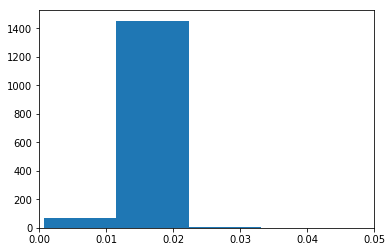

state 06 0 1528


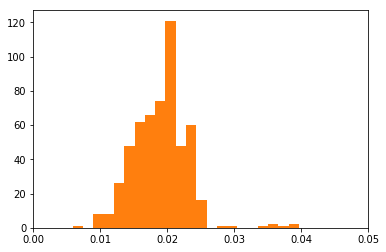

state 19 212 547


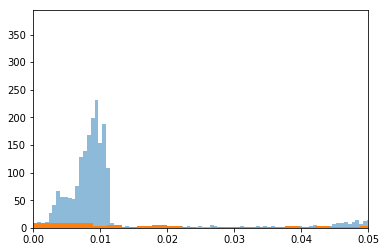

state 36 2083 2083


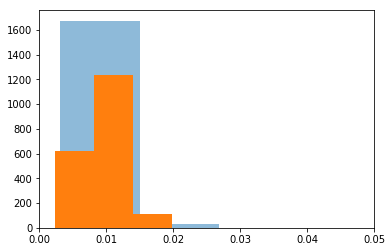

state 37 1719 1974


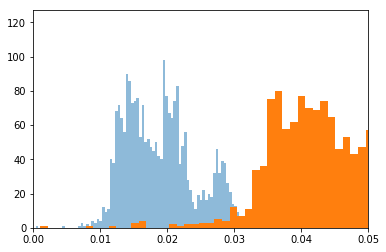

state 39 2383 2506


In [45]:
for state in ['06', '19','36','37','39']:
    subdf=newdata[newdata.state==state]
    subdf['ratio']= (subdf['taxamount'])/(subdf['totalmarketvalue'])
    subdf['ratio2']= (subdf['taxamount'])/(subdf['totalassessedvalue']) 
    a=subdf[['tract','ratio']].dropna().groupby('tract').median().iloc[:,0]
    if len(a)>1:
        plt.hist(a,bins=100,alpha=0.5,label='r1')
    b=subdf[['tract','ratio2']].dropna().groupby('tract').median().iloc[:,0] 
    if len(b)>1:
        plt.hist(b,bins=100,label='r2')
    plt.xlim([0,0.05])
    plt.show()
    print 'state', state, len(a), len(b)
    


/home/bo/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars


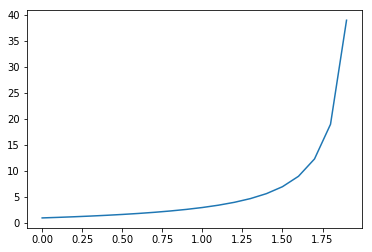

In [25]:
#(a-b)=k/2*(a+b)
#a(1-k/2)=b(1+k/2)
#a/b=(1+k/2)/(1-k/2)
lst=[]
for k in np.arange(0,2.1,0.1):
    lst.append([ k, (1+k/2)/(1-k/2)])
lst=np.array(lst)
plot(lst[:,0],lst[:,1])

In [26]:
subdf.head()

assessmentyear  taxratecodearea   parcelid  improvementmarketvalue  \
401256            2017              NaN  165216844                 23100.0   
424288            2017              NaN  115354709                 69700.0   
424289            2017              NaN  115354708                 40830.0   
424290            2017              NaN  115354694                 66110.0   
424291            2017              NaN  115354686                 35380.0   

        structuretaxvaluedollarcnt  totalassessedvalue    taxamount  \
401256                     23100.0             12490.0   508.579987   
424288                     69700.0             28060.0  1225.780029   
424289                     40830.0             16090.0  1619.859985   
424290                     66110.0             26030.0   385.609985   
424291                     35380.0             16640.0  2590.469971   

        taxvaluedollarcnt  edition  landassessedvalue  taxdelinquencyyear  \
401256            35660.0       19             4400.0                 NaN   
424288            80150.0       19             3660.0                 NaN   
424289            45960.0       19             1800.0                13.0   
424290            74360.0       19             2890.0                 NaN   
424291            47560.0       19             4260.0                 NaN   

        totalmarketvalue  improvementassessedvalue  landtaxvaluedollarcnt  \
401256           35660.0                    8090.0                12560.0   
424288           80150.0                   24400.0                10450.0   
424289           45960.0                   14290.0                 5130.0   
424290           74360.0                   23140.0                 8250.0   
424291           47560.0                   12380.0                12180.0   

        landmarketvalue state county        tract   ind     ratio  
401256          12560.0    39  39145  39145002400  True  0.962264  
424288          10450.0    39  39145  39145003000  True  0.962438  
424289           5130.0    39  39145  39145003100  True  0.961039  
424290           8250.0    39  39145  39145003000  True  0.962298  
424291          12180.0    39  39145  39145003100  True  0.963504